<h1 style="font-size:200%"><center> Capstone Project 2 : Supermarket Customer Segementation</center></h1>
<hr>

<h3>Created by : <br> Nurdiansyah</h3>
<div style="text-align: center;">
    <div class='tableauPlaceholder' id='viz1736315144821' style='position: relative'><noscript><a href='#'><img alt='Segmentation Costumers ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_17361672679150&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book1_17361672679150&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_17361672679150&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div> 
    <script type='text/javascript'>var divElement = document.getElementById('viz1736315144821');                    var vizElement = divElement.getElementsByTagName('object')[0];if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1527px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);
    </script>
</div>





<style>
        a {
            color: inherit; /* This will make the link inherit the color from its parent element */
            text-decoration: none; /* This will remove the underline from the link */
        }
    </style>
<h2>Data Source:<br> <a href="https://drive.google.com/file/d/1lGG2nBWS5lVEpmmBZp2r0Koesa4t6c7W/view?usp=sharing">Supermarket Customer.csv</a></h2>

1. Business Problem Understanding
2. Data Understanding and Cleaning
3. Explanatory Data Analysis
4. Probability and Financial Analysis
5. Conclusion And Recomendation
<hr>

<h2>Business Understanding</h2>
Melakukan analisis komprehensif terhadap atribut-atribut kunci pelanggan supermarket, yang mencakup kebutuhan, perilaku, dan motivasi, merupakan tantangan tersendiri dalam industri ritel. Pendekatan bisnis yang berorientasi pada pelanggan ini krusial dalam merumuskan strategi pemasaran yang efektif, mengoptimalkan efisiensi operasional, dan membangun loyalitas pelanggan jangka panjang.

Oleh karena itu, diperlukan insight bisnis yang mendalam dan intelligence yang memadai untuk menentukan langkah-langkah strategis yang tepat bagi sebuah supermarket.

<h3>Problem Statement :</h3>
Karena jumlah konsumen yang sangat banyak dan beragam, kampaye/marketing yang dilakukan tidak akan terlalu signifikan jika Supermarket tidak memberikan tawaran yang sesuai dengan preferensi kebutuhan belanja konsimen. Oleh karena itu dibutuhkan analisis pada pola perbelanjaan pelanggan agar dapat melihat pattern yang sesuai dengan preferensi belanja konsumen


<h3>Tujuan :</h3>
Sebagai data Scientist, saya akan mencoba untuk <br>
-   Mengidentifikasi segmentasi pelanggan yang lebih spesifik. Dengan memahami karakteristik dan kebutuhan tiap segmen, Supermarket dapat merancang kampanye pemasaran yang lebih personal dan relevan. Misalnya, menawarkan promo produk organik kepada segmen pelanggan yang peduli kesehatan, atau memberikan diskon mainan kepada segmen keluarga dengan anak kecil.<br><br>
-   Meningkatkan efektivitas kampanye pemasaran. Dengan mengetahui produk apa saja yang sering dibeli bersamaan, Supermarket dapat menawarkan bundling product, menempatkan produk yang relevan secara berdekatan, atau memberikan rekomendasi produk yang sesuai di website dan aplikasi.
Mengelola stok barang secara lebih efisien. Dengan menganalisis pola pembelian, Supermarket dapat memprediksi permintaan produk dengan lebih akurat, sehingga dapat mengoptimalkan stok barang dan meminimalkan waste.<br><br>
-   Meningkatkan customer experience. Dengan memahami preferensi pelanggan, Supermarket dapat menciptakan pengalaman belanja yang lebih personal dan menyenangkan, baik di toko offline maupun online. Misalnya, dengan memberikan rekomendasi produk yang relevan, menawarkan layanan personal shopper, atau menyediakan self-checkout bagi pelanggan yang menginginkan proses belanja yang cepat.
Mempertahankan pelanggan dan meningkatkan customer lifetime value. Dengan memberikan penawaran yang sesuai dengan kebutuhan dan preferensi pelanggan, Supermarket dapat membangun loyalitas dan mendorong pelanggan untuk berbelanja lebih sering.


Bersarkan permasalahan diatas, saya akan membuat suatu tools yang dapat mempelajari pattern karakteristik konsumen yang berpotensi untuk meningkatkan jumlah transaksi berdarkan fitur-fitur yang tersedia, dan mengarahkan target marketing ke pelanggan yang memiliki karakter mirip atau sama berdasarkan pattern tersebut.


Hasil dari temuan akan dipresentasikan kepada Management untuk mereka agar dapat mengambil keputusan dan menyusun strategi untuk menetapkan langkah apa yang akan diambil selanjutnya guna meningkatkan sales dari supermarket.

Management : Manager Marketing Supermarket, BoD Supermarket
<h4>Analytic Approach :</h4>
<br>
Pertama, data akan di analisis dengan menemukan karakteristik konsumen berdasarkan kelompok data tertentu agar dapat menentukan perilaku dari kelompok yang ditentukan berdasarkan banyaknya suatu produk di beli.
Setelah itu data akan dianalisi menggunakan Statistik Inferensi untuk menemukan keterikatan dari variabel berdasarkan kelompok yang ditentukan

## Data Understanding and Cleaning
<h2 style="font-size:100%">People:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>ID</td>
        <td>ID Unik Konsumen</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Year_Birth</td>
        <td>Tahun Lahir Konsumen</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Education</td>
        <td>Tingkat Pendidikan Konsumen</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Marital_Status</td>
        <td>Status Pernikahan Konsumen</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Income</td>
        <td>Pendapatan Per Tahun</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Kidhome</td>
        <td>Jumlah Anak Kecil Dalam Rumah Tangga Konsumen </td>
    </tr>
    <tr>
        <td>7</td>
        <td>Teenhome</td>
        <td>Jumlah Remaja Dalam Rumah Tangga Konsumen</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Dt_Customer</td>
        <td>Tanggal Konsumen Terdaftar </td>
    </tr>
    <tr>
        <td>9</td>
        <td>Recency</td>
        <td>Jumlah hari sejak pembelian terakhir Konsumen</td>
    </tr>
    <tr>
        <td>10</td>
        <td>Complain</td>
        <td>1 jika pelanggan mengajukan komplain dalam 2 tahun terakhir, 0 jika tidak</td>
    </tr>
</table>

<h2 style="font-size:100%">Products:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>11</td>
        <td>MntWines</td>
        <td>Total pengeluaran untuk anggur dalam 2 tahun terakhir</td>
    </tr>
    <tr>
        <td>12</td>
        <td>MntFruits</td>
        <td>Total pengeluaran untuk buah-buahan dalam 2 tahun terakhir</td>
    </tr>
    <tr>
        <td>13</td>
        <td>MntMeatProducts</td>
        <td>Total pengeluaran untuk daging dalam 2 tahun terakhir</td>
    </tr>
    <tr>
        <td>14</td>
        <td>MntFishProducts</td>
        <td>Total pengeluaran untuk ikan dalam 2 tahun terakhir</td>
    </tr>
    <tr>
        <td>15</td>
        <td>MntSweetProducts</td>
        <td>Jumlah uang yang dihabiskan untuk manisan dalam 2 tahun terakhir /td>
    </tr>
    <tr>
        <td>16</td>
        <td>MntGoldProds</td>
        <td>Total pengeluaran untuk emas dalam 2 tahun terakhir</td>
    </tr>
</table>

<h2 style="font-size:100%">Promotion:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>17</td>
        <td>NumDealsPurchases</td>
        <td>Total pembelian dengan diskon</td>
    </tr>
    <tr>
        <td>18</td>
        <td>AcceptedCmp1</td>
        <td>1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak</td>
    </tr>
    <tr>
        <td>19</td>
        <td>AcceptedCmp2</td>
        <td>1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak</td>
    </tr>
    <tr>
        <td>20</td>
        <td>AcceptedCmp3</td>
        <td>1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak</td>
    </tr>
    <tr>
        <td>21</td>
        <td>AcceptedCmp4</td>
        <td>1 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak</td>
    </tr>
     <tr>
        <td>21</td>
        <td>AcceptedCmp5</td>
        <td>1 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak</td>
    </tr>
    <tr>
        <td>22</td>
        <td>Response</td>
        <td>1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak</td>
    </tr>
</table>
<h2 style="font-size:100%">Place:</h2>
<table>
    <tr>
        <th>#</th>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>23</td>
        <td>NumWebPurchases:</td>
        <td>Total pembelian melalui situs web perusahaan</td>
    </tr>
    <tr>
        <td>24</td>
        <td>NumCatalogPurchases:</td>
        <td>Total pembelian menggunakan katalog</td>
    </tr>
    <tr>
        <td>25</td>
        <td>NumStorePurchases:</td>
        <td>Jumlah pembelian di toko (offline) </td>
    </tr>
    <tr>
        <td>26</td>
        <td>NumWebVisitsMonth::</td>
        <td>Total kunjungan ke situs web perusahaan selama sebulan terakhir</td>
    </tr>
</table>
   

## Importing Libraries

In [48]:
# Warnings
import os, warnings
warnings.filterwarnings("ignore")

#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy.stats import normaltest
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from IPython.display import display, Image
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score

from flask import Flask,jsonify,request,render_template

np.random.seed(7)
plt.rcParams['figure.figsize'] = (16, 6)
# to change default colormap
sns.set(style="darkgrid")
sns.set_palette("pastel")

## Load Dataset

In [49]:
df = pd.read_csv('Supermarket Customers.csv', delimiter ="\t")
pd.set_option('display.max_columns', None)
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari `df.info`, terlihat bahwa dataset memiliki `29 kolom` dan `2240 baris`

In [51]:
display(df.describe(), df.describe(include=['object']))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


<h4>Insight :</h4>
1.  Tahun kelahiran tertua adalah 1893 termuda 1996<br>
2.  Kolom Income memiliki 24 missing value dan oulier <br>
4.  Maksimal jumlah anak kecil dalam satu rumah tangga adalah 2<br>
5.  Maksimal jumlah remaja dalam satu rumah tangga adalah 2<br>
6.  Jumlah hari sejak pembelian terakhir paling cepat adalah 0 hari dan paling lama adalah 99 hari<br>
7.  MntWines menduduki peringkat 1 dalam penjualan<br>
8.  MntFruits kurang diminati oleh konsumen.<br>
9.  Rekor transaksi terbanyak yang dilakukan individu melalui web adalah 27 transaksi.<br>
10. Rekor transaksi terbanyak yang dilakukan oleh satu orang melalui katalog adalah 28 transaksi.<br>
11. Rekor transaksi terbanyak melalui toko adalah 13 transaksi<br>
12. Rekor kunjungan web per bulan adalah 20 kunjungan<br>
13. Kolom Z_CostContract dan Z_Revenue hanya memiliki satu nilai unik, sehingga sulit untuk diinterpretasikan<br>
14. Pada kolom Education, 'Graduation' merupakan data yang paling banyak muncul, yaitu sebanyak 1127 kali<br>
15. Pada kolom Marital_Status, 'Married' merupakan data yang paling banyak muncul, yaitu sebanyak 846 kali<br>
16. Data terbanyak pada kolom Dt_Customer adalah tanggal 31-08-2012, dengan 12 entri<br>
17. Kolom Dt_Customer termasuk data categorical

## Explanatory Data Analysis

<h4>Unique value dan Duplikat</h4>

In [52]:
list_item = []
for col in df.columns :
    list_item.append( [col, df[col].unique(), df[col].unique() ])
unique_value = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                data=list_item)
pd.set_option('max_colwidth', None)

unique_value

,Column Name,Number of Unique,Unique Sample
0,ID,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]","[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]","[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,"[Graduation, PhD, Master, Basic, 2n Cycle]","[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]","[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]","[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 

<h4>Duplicated Data</h4>

In [53]:
list_duplicated = []
for col in df.columns :
    list_duplicated.append( [col, df[col].duplicated(), df[col].duplicated() ])
duplicated_value = pd.DataFrame(columns=['Column Name', 'Number Duplicated', 'Duplicated Sample'],
                data=list_duplicated)
pd.set_option('max_colwidth', None)

duplicated_value

,Column Name,Number Duplicated,Duplicated Sample
0,ID,"0 False 1 False 2 False 3 False 4 False ... 2235 False 2236 False 2237 False 2238 False 2239 False Name: ID, Length: 2240, dtype: bool","0 False 1 False 2 False 3 False 4 False ... 2235 False 2236 False 2237 False 2238 False 2239 False Name: ID, Length: 2240, dtype: bool"
1,Year_Birth,"0 False 1 False 2 False 3 False 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Year_Birth, Length: 2240, dtype: bool","0 False 1 False 2 False 3 False 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Year_Birth, Length: 2240, dtype: bool"
2,Education,"0 False 1 True 2 True 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Education, Length: 2240, dtype: bool","0 False 1 True 2 True 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Education, Length: 2240, dtype: bool"
3,Marital_Status,"0 False 1 True 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Marital_Status, Length: 2240, dtype: bool","0 False 1 True 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Marital_Status, Length: 2240, dtype: bool"
4,Income,"0 False 1 False 2 False 3 False 4 False ... 2235 False 2236 True 2237 False 2238 False 2239 False Name: Income, Length: 2240, dtype: bool","0 False 1 False 2 False 3 False 4 False ... 2235 False 2236 True 2237 False 2238 False 2239 False Name: Income, Length: 2240, dtype: bool"
5,Kidhome,"0 False 1 False 2 True 3 True 4 True ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Kidhome, Length: 2240, dtype: bool","0 False 1 False 2 True 3 True 4 True ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Kidhome, Length: 2240, dtype: bool"
6,Teenhome,"0 False 1 False 2 True 3 True 4 True ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Teenhome, Length: 2240, dtype: bool","0 False 1 False 2 True 3 True 4 True ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Teenhome, Length: 2240, dtype: bool"
7,Dt_Customer,"0 False 1 False 2 False 3 False 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Dt_Customer, Length: 2240, dtype: bool","0 False 1 False 2 False 3 False 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Dt_Customer, Length: 2240, dtype: bool"
8,Recency,"0 False 1 False 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Recency, Length: 2240, dtype: bool","0 False 1 False 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 True 2239 True Name: Recency, Length: 2240, dtype: bool"
9,MntWines,"0 False 1 False 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 False 2239 True Name: MntWines, Length: 2240, dtype: bool","0 False 1 False 2 False 3 True 4 False ... 2235 True 2236 True 2237 True 2238 False 2239 True Name: MntWines, Length: 2240, dtype: bool"


<h4>Insight:</h4>
Analisis data menunjukkan bahwa kolom `ID` tidak memiliki data duplikat, yang berarti setiap transaksi tercatat secara unik.  Akan tetapi, terdapat data duplikat pada kolom lain seperti 'Recency'.<br>Hal ini mengindikasikan kemungkinan konsumen adanya transaksi di mana pelanggan  melakukan transaksi bersamaan, bukan melakukan pembelian berulang pada waktu yang berbeda.
hal ini menunjukkan bahwa CRM belum terlaksana dengan baik

In [54]:
df['Recency'].duplicated().sum()

np.int64(2140)

In [55]:
#Shortcut untuk menampilkan visualisasi

def set_labels(x="", y="", title="", axis=None):
  if axis:
    axis.set_xlabel(x);
    axis.set_ylabel(y);
    axis.set_title(title);
  else:
    plt.title(title);
    plt.xlabel(x);
    plt.ylabel(y);

<h4>Analisis Sebaran Data Categorical</h4>

Dt_Customer

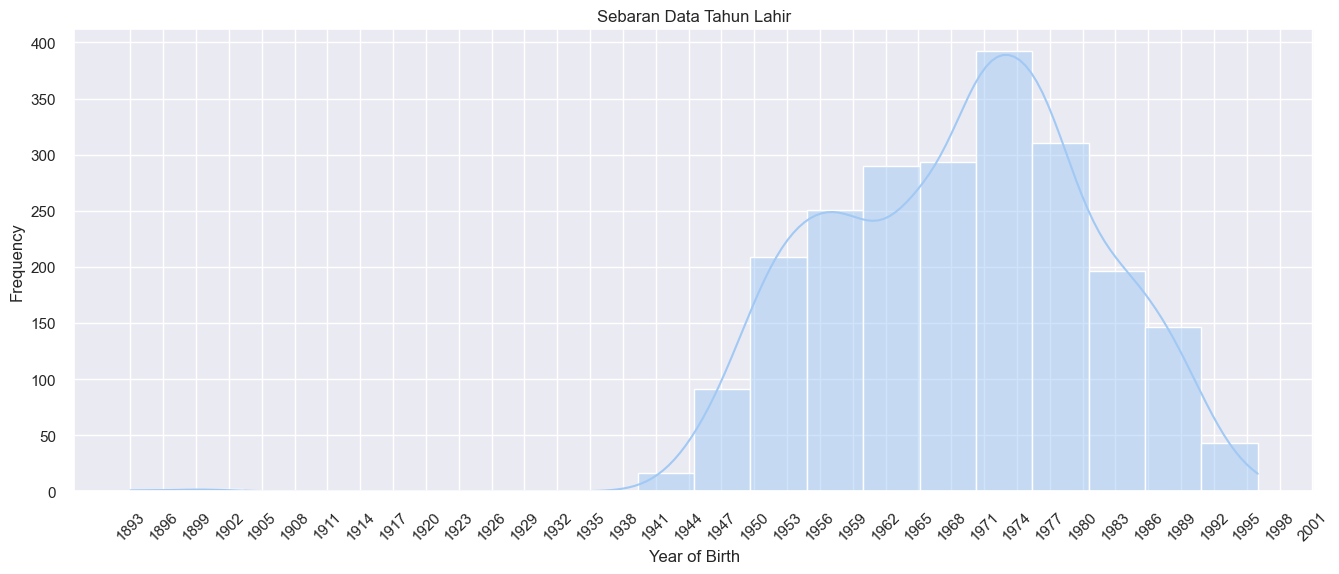

In [56]:
set_labels(x="Year of Birth", y="Frequency", title="Sebaran Data Tahun Lahir")
plt.xticks(list(range(1893,2003,3)), rotation=45)
plt.grid(True)
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.show()

<h4>Insight :</h4><br>
Sebagian besar konsumen lahir antara tahun 1970 hingga 1980, yang berarti usia mereka saat ini sekitar 39 tahun (dihitung dengan mengurangkan tahun lahir dengan median tahun Dt_Customer).Namun, terdapat beberapa individu dengan tahun lahir di bawah 1902. Data ini  mengindikasikan usia yang tidak wajar, yaitu mencapai 112 tahun, dan  kemungkinan besar merupakan kesalahan input atau data anomali.  Oleh karena itu, data individu-individu dengan tahun lahir di bawah 1902 akan dianggap sebagai outlier.

Education

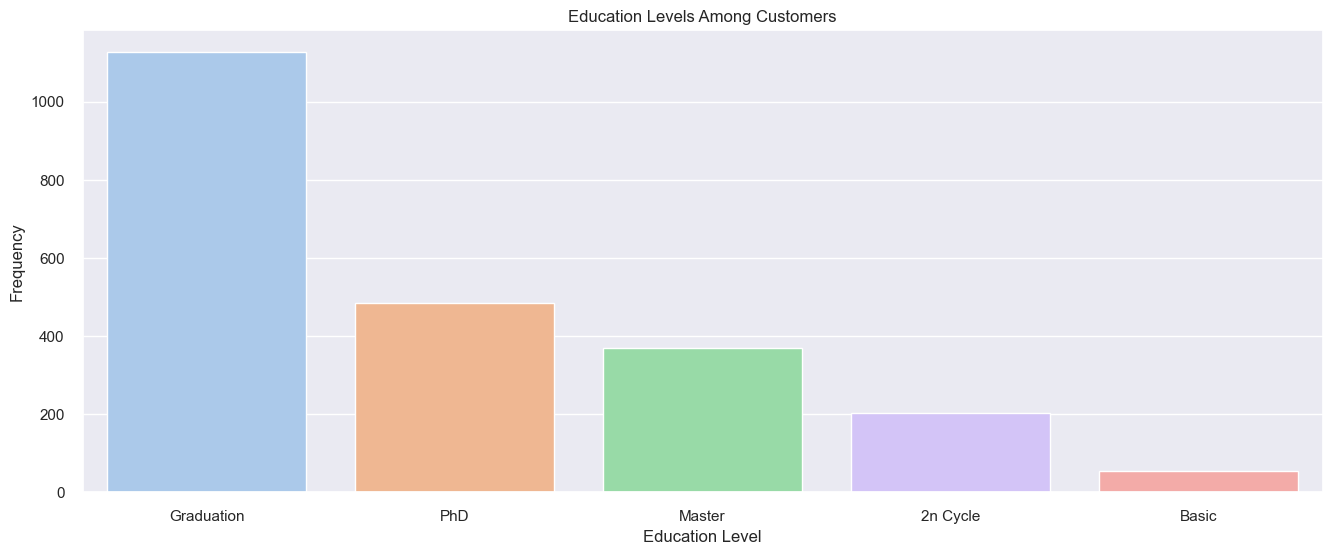

In [57]:
set_labels(x="Education Level", y="Frequency", title="Education Levels Among Customers")
sns.countplot(x=df.Education, order = df.Education.value_counts().index, hue=df.Education, legend=False)
plt.show()

Insight :

Dari visualisasi data terlihat data mayoritas pendidikan dari konsumen Bergelar Graduation, dan dari yang paling sedikit adalah dengan Gelar Basic

In [58]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Marital_Status

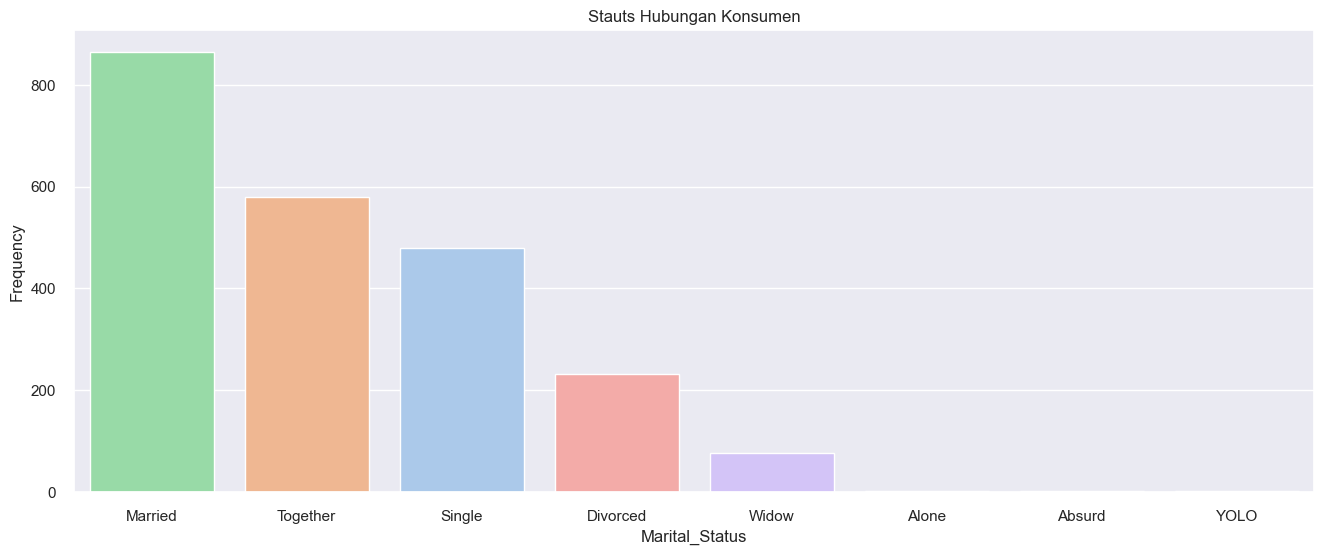

In [59]:
set_labels(x="Marital_Status", y="Frequency", title="Stauts Hubungan Konsumen")
sns.countplot(x=df.Marital_Status, order = df.Marital_Status.value_counts().index, hue=df.Marital_Status, legend=False)
plt.show()

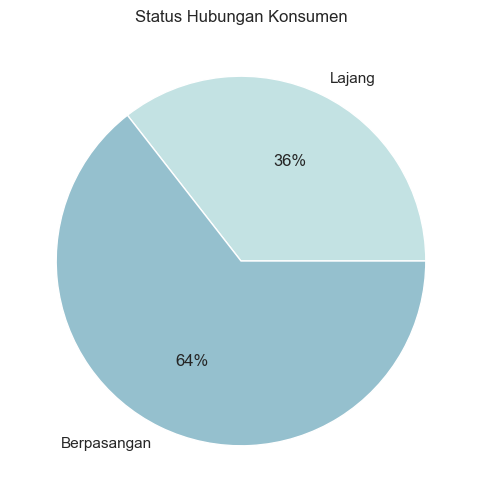

In [60]:
single = df['Marital_Status'][df['Marital_Status'].isin(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'])].count()
relationship = df['Marital_Status'][df['Marital_Status'].isin(['Married', 'Together'])].count()


set_labels(title="Status Hubungan Konsumen")
color = sns.color_palette('ch:start=.2,rot=-.3')
plt.pie([single, relationship], labels = ['Lajang', 'Berpasangan'], autopct='%.0f%%', colors=color)
plt.show()

<h3>Insight :</h3><br>
Mayoritas pelanggan berstatus menikah,  namun  kolom Marital_Status juga  menunjukkan beberapa status yang ambigu, seperti Absurd dan YOLO.  Karena  status-status tersebut  sulit diinterpretasikan dan dapat memengaruhi analisis, maka  data akan dikelompokkan menjadi dua kategori yang lebih umum:  Couple (berpasangan), yang mencakup status Married dan Together, dan  Jones (lajang), yang mencakup  status lainnya.  Dari pie chart, terlihat bahwa 65% pelanggan berstatus berpasangan.

<h4>Analisis Sebaran Data Numerical</h4>

<Figure size 2000x1500 with 0 Axes>

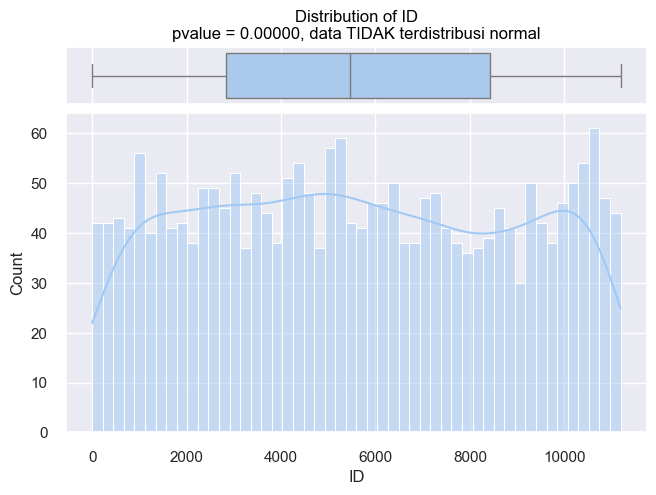

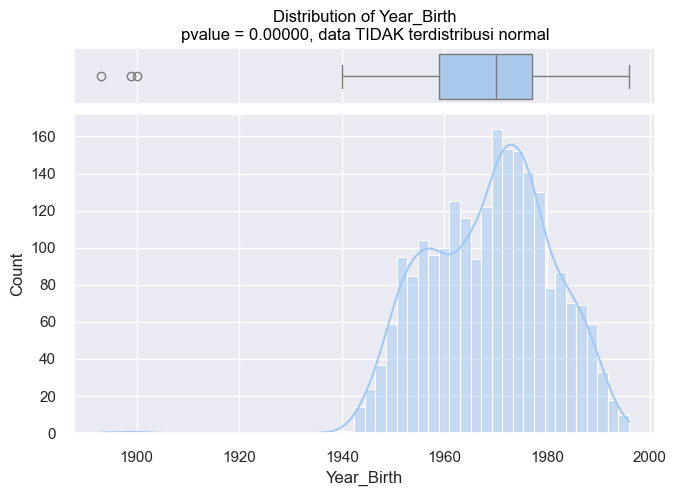

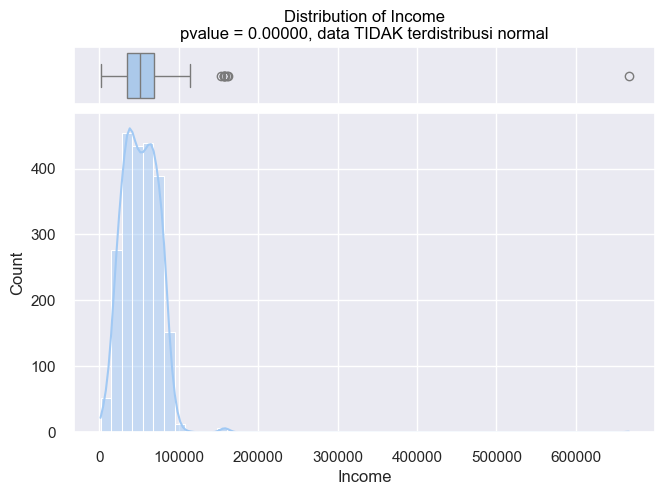

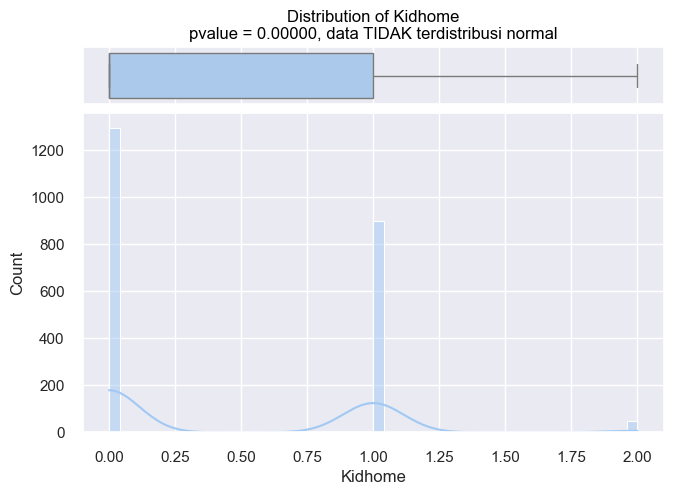

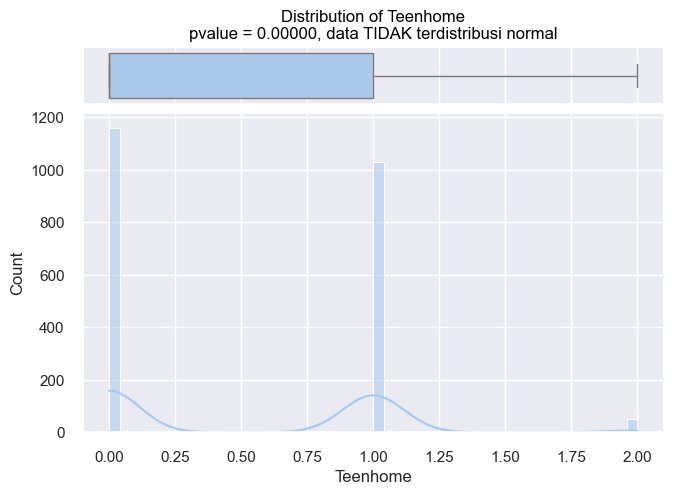

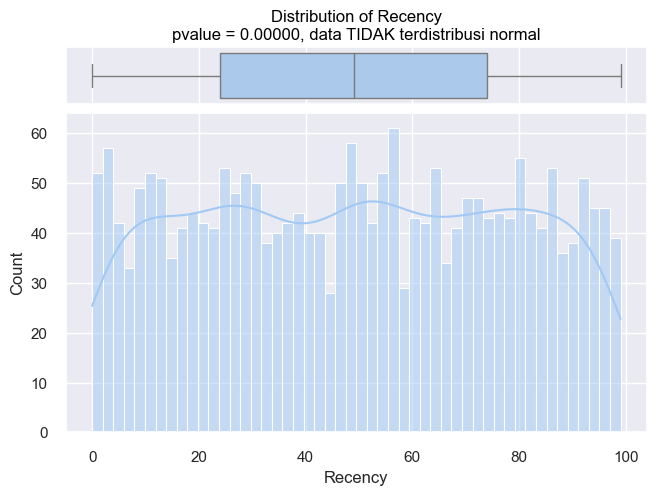

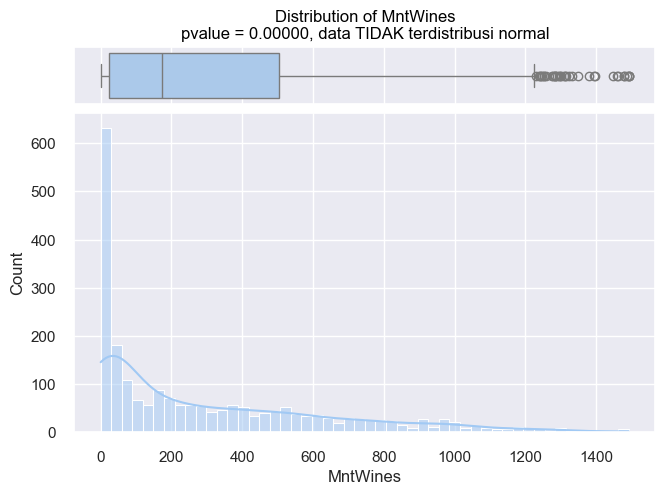

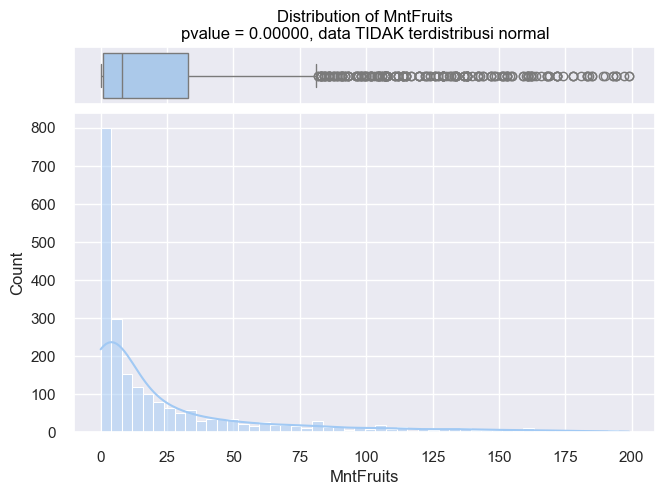

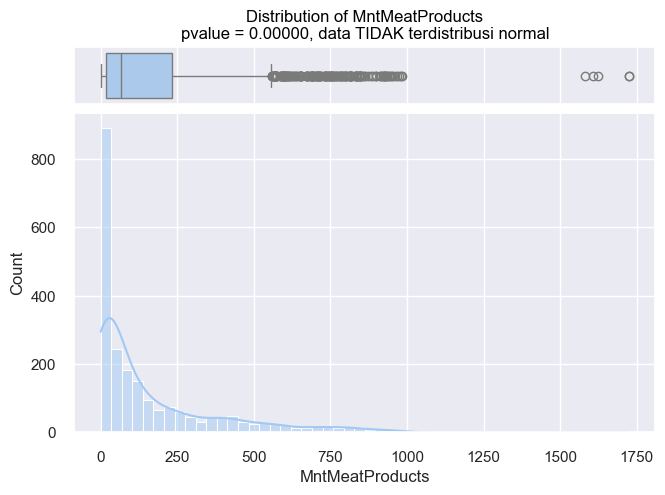

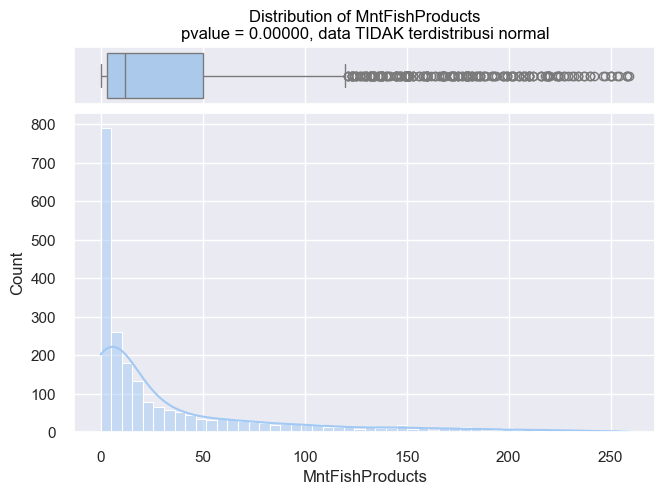

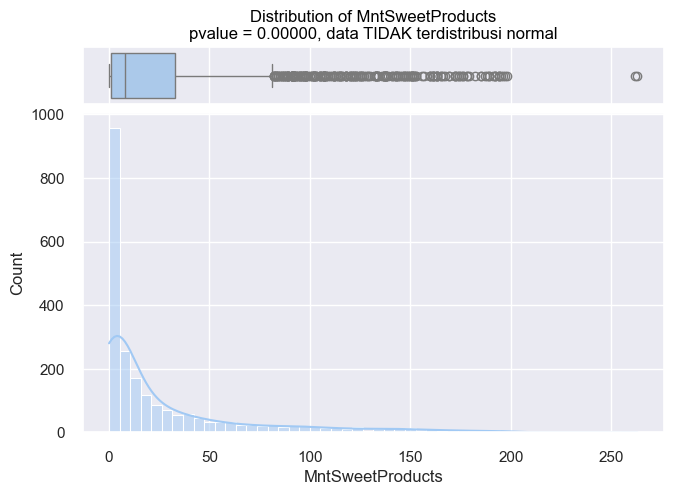

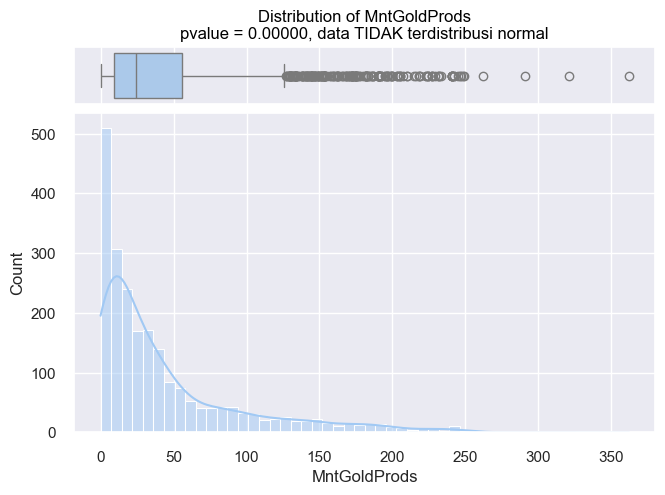

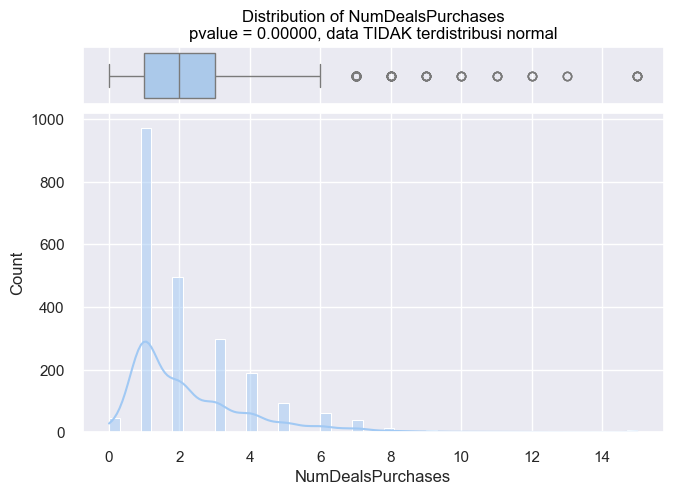

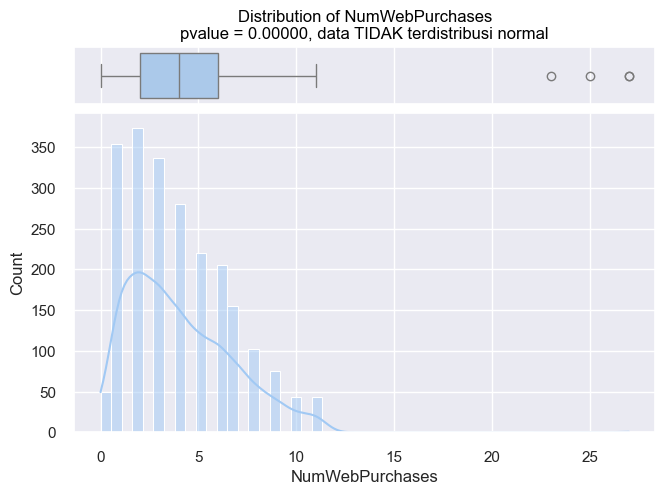

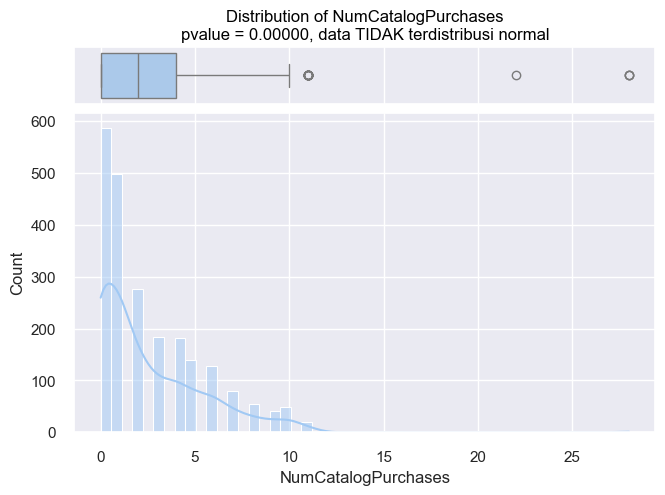

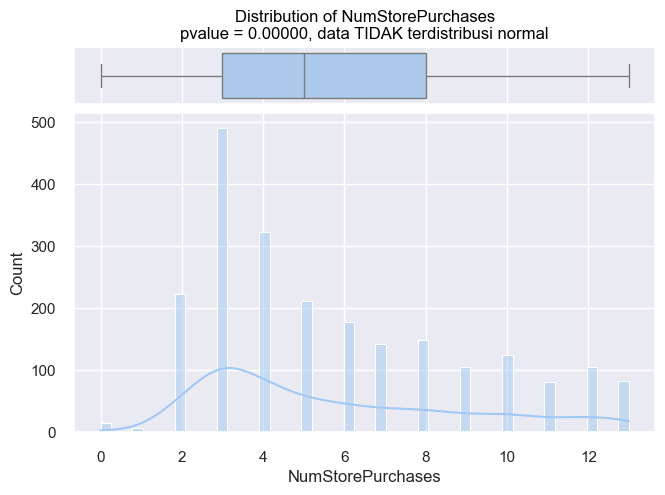

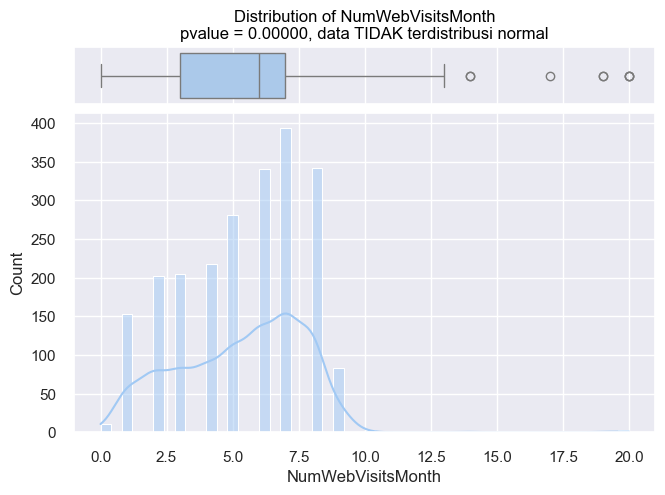

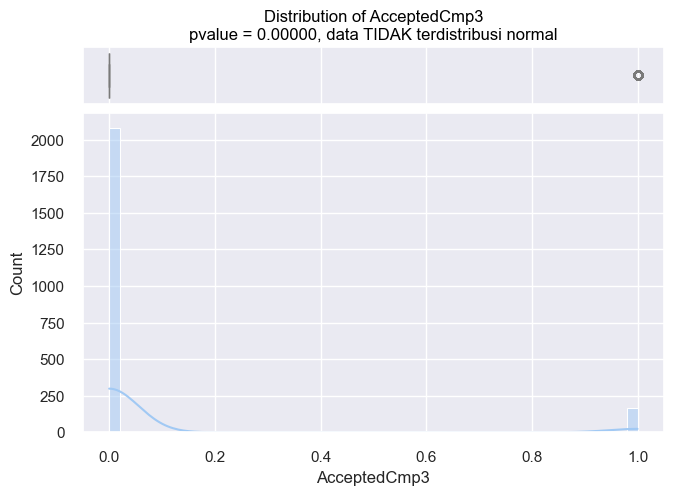

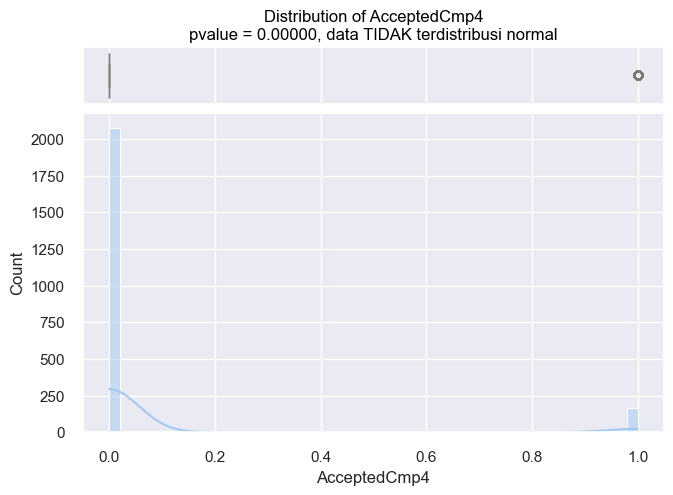

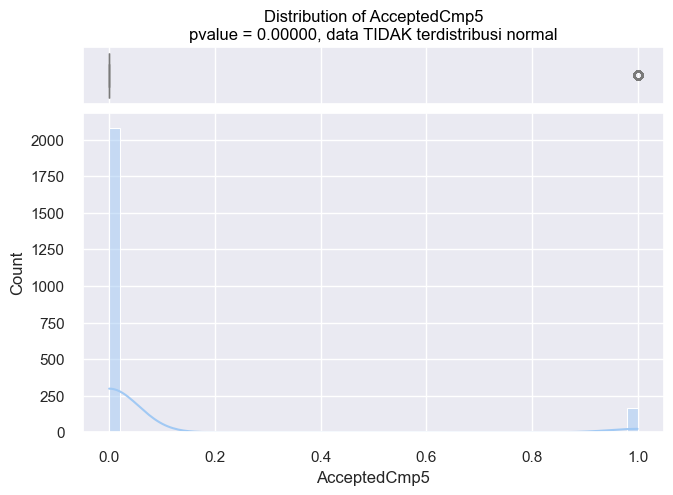

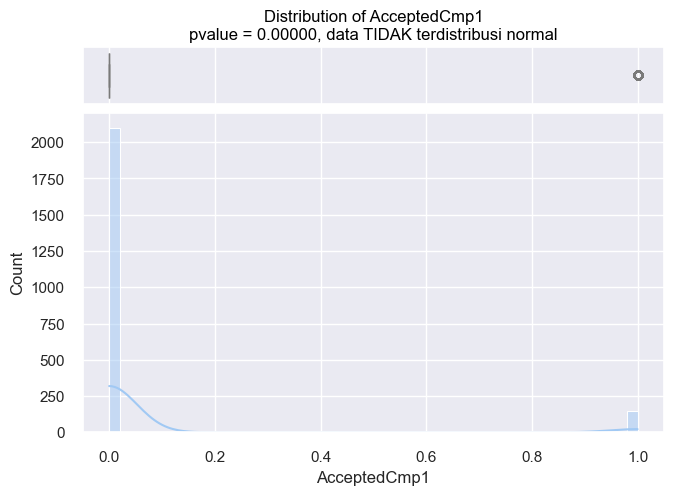

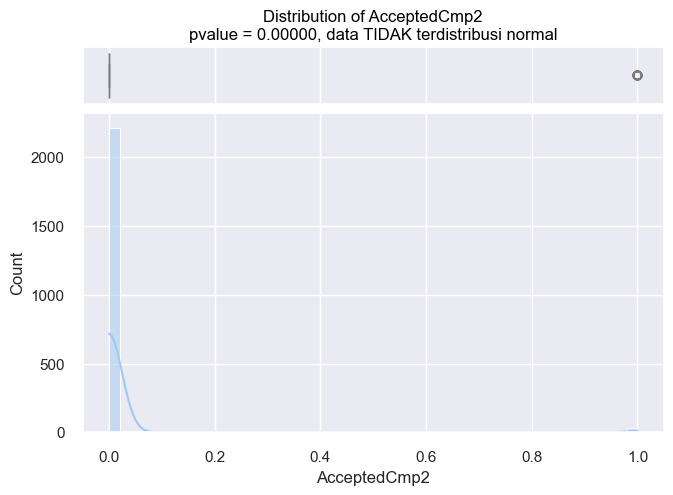

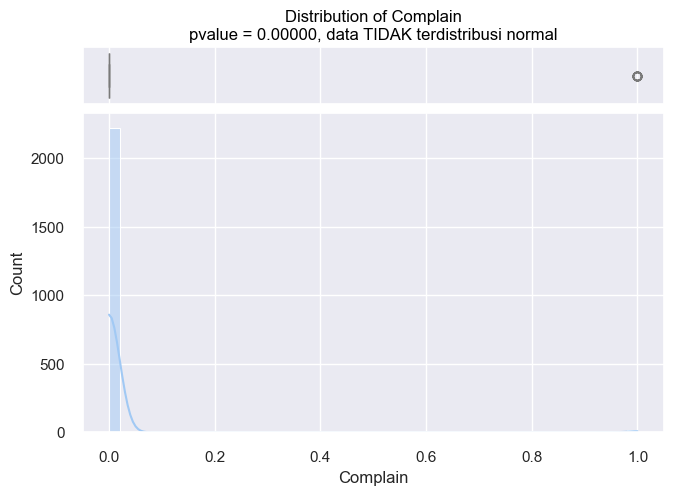

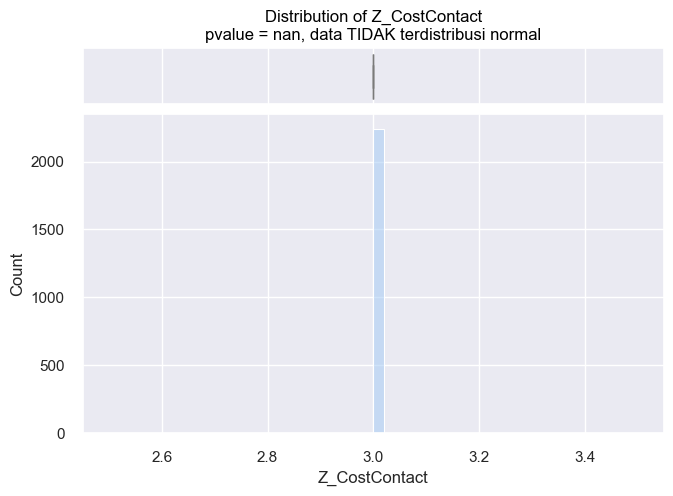

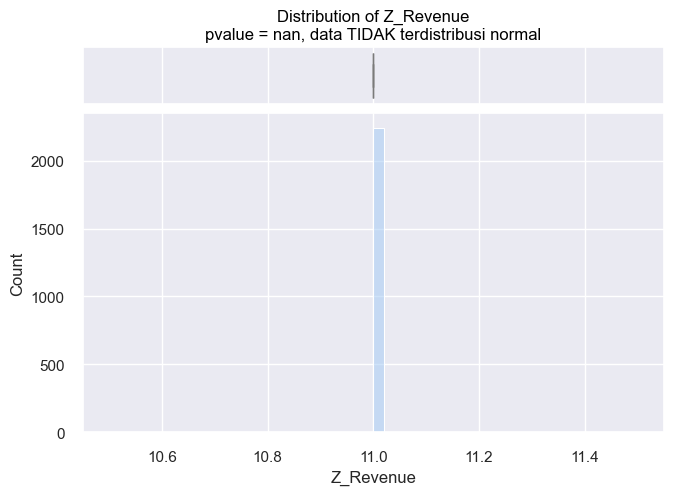

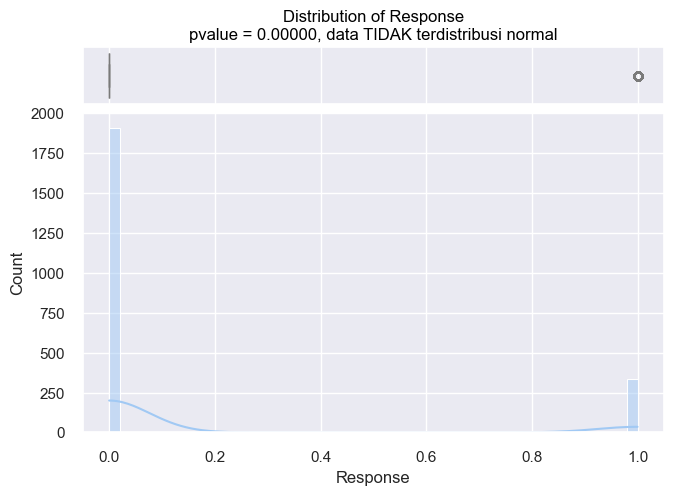

In [61]:
numcerial_Fit = df.describe().columns
# Plot distribusi data numerikal pada dataset, beserta uji hipotesa dengan menggunakan normaltest
plt.figure(figsize=(20,15))
for kolom in numcerial_Fit :

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "count", kde=True, bins=50)

    plt.show()

<h4>Karakteristik Konsumen :</h4>

Distribusi Data:
Tidak ada data yang terdistribusi normal.
Usia konsumen berkisar antara 18 hingga 120 tahun.
Terdapat satu konsumen dengan penghasilan terbesar, yaitu sekitar $700.000 per tahun.

Demografi Konsumen:<br>
Mayoritas konsumen berpendidikan terakhir Graduation.
Status perkawinan konsumen lebih banyak yang Couple dibandingkan Single.
Sebagian besar konsumen tidak memiliki anak kecil.
Jumlah konsumen yang tidak memiliki remaja sedikit lebih banyak daripada yang memiliki remaja.

Perilaku Konsumen:<br>
Waktu terlama sejak pembelian terakhir adalah hampir 100 hari, sedangkan tercepat adalah 0 hari.
Produk wines adalah produk yang paling banyak dibeli.
Transaksi lebih banyak dilakukan di toko fisik dibandingkan melalui katalog dan website.
Kunjungan website terbanyak per bulan adalah sekitar 6 kali kunjungan.

Variabel yang Tidak Relevan:<br>
Kolom Z_CostContact dan Z_Revenue hanya memiliki satu nilai unik sehingga tidak dapat merepresentasikan apapun.

<h3>Data Cleaning</h3>

In [62]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [63]:
# Hapus baris dengan missing value
df.dropna(inplace=True)
# Hapus kolom yang tidak dibutuhkan
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

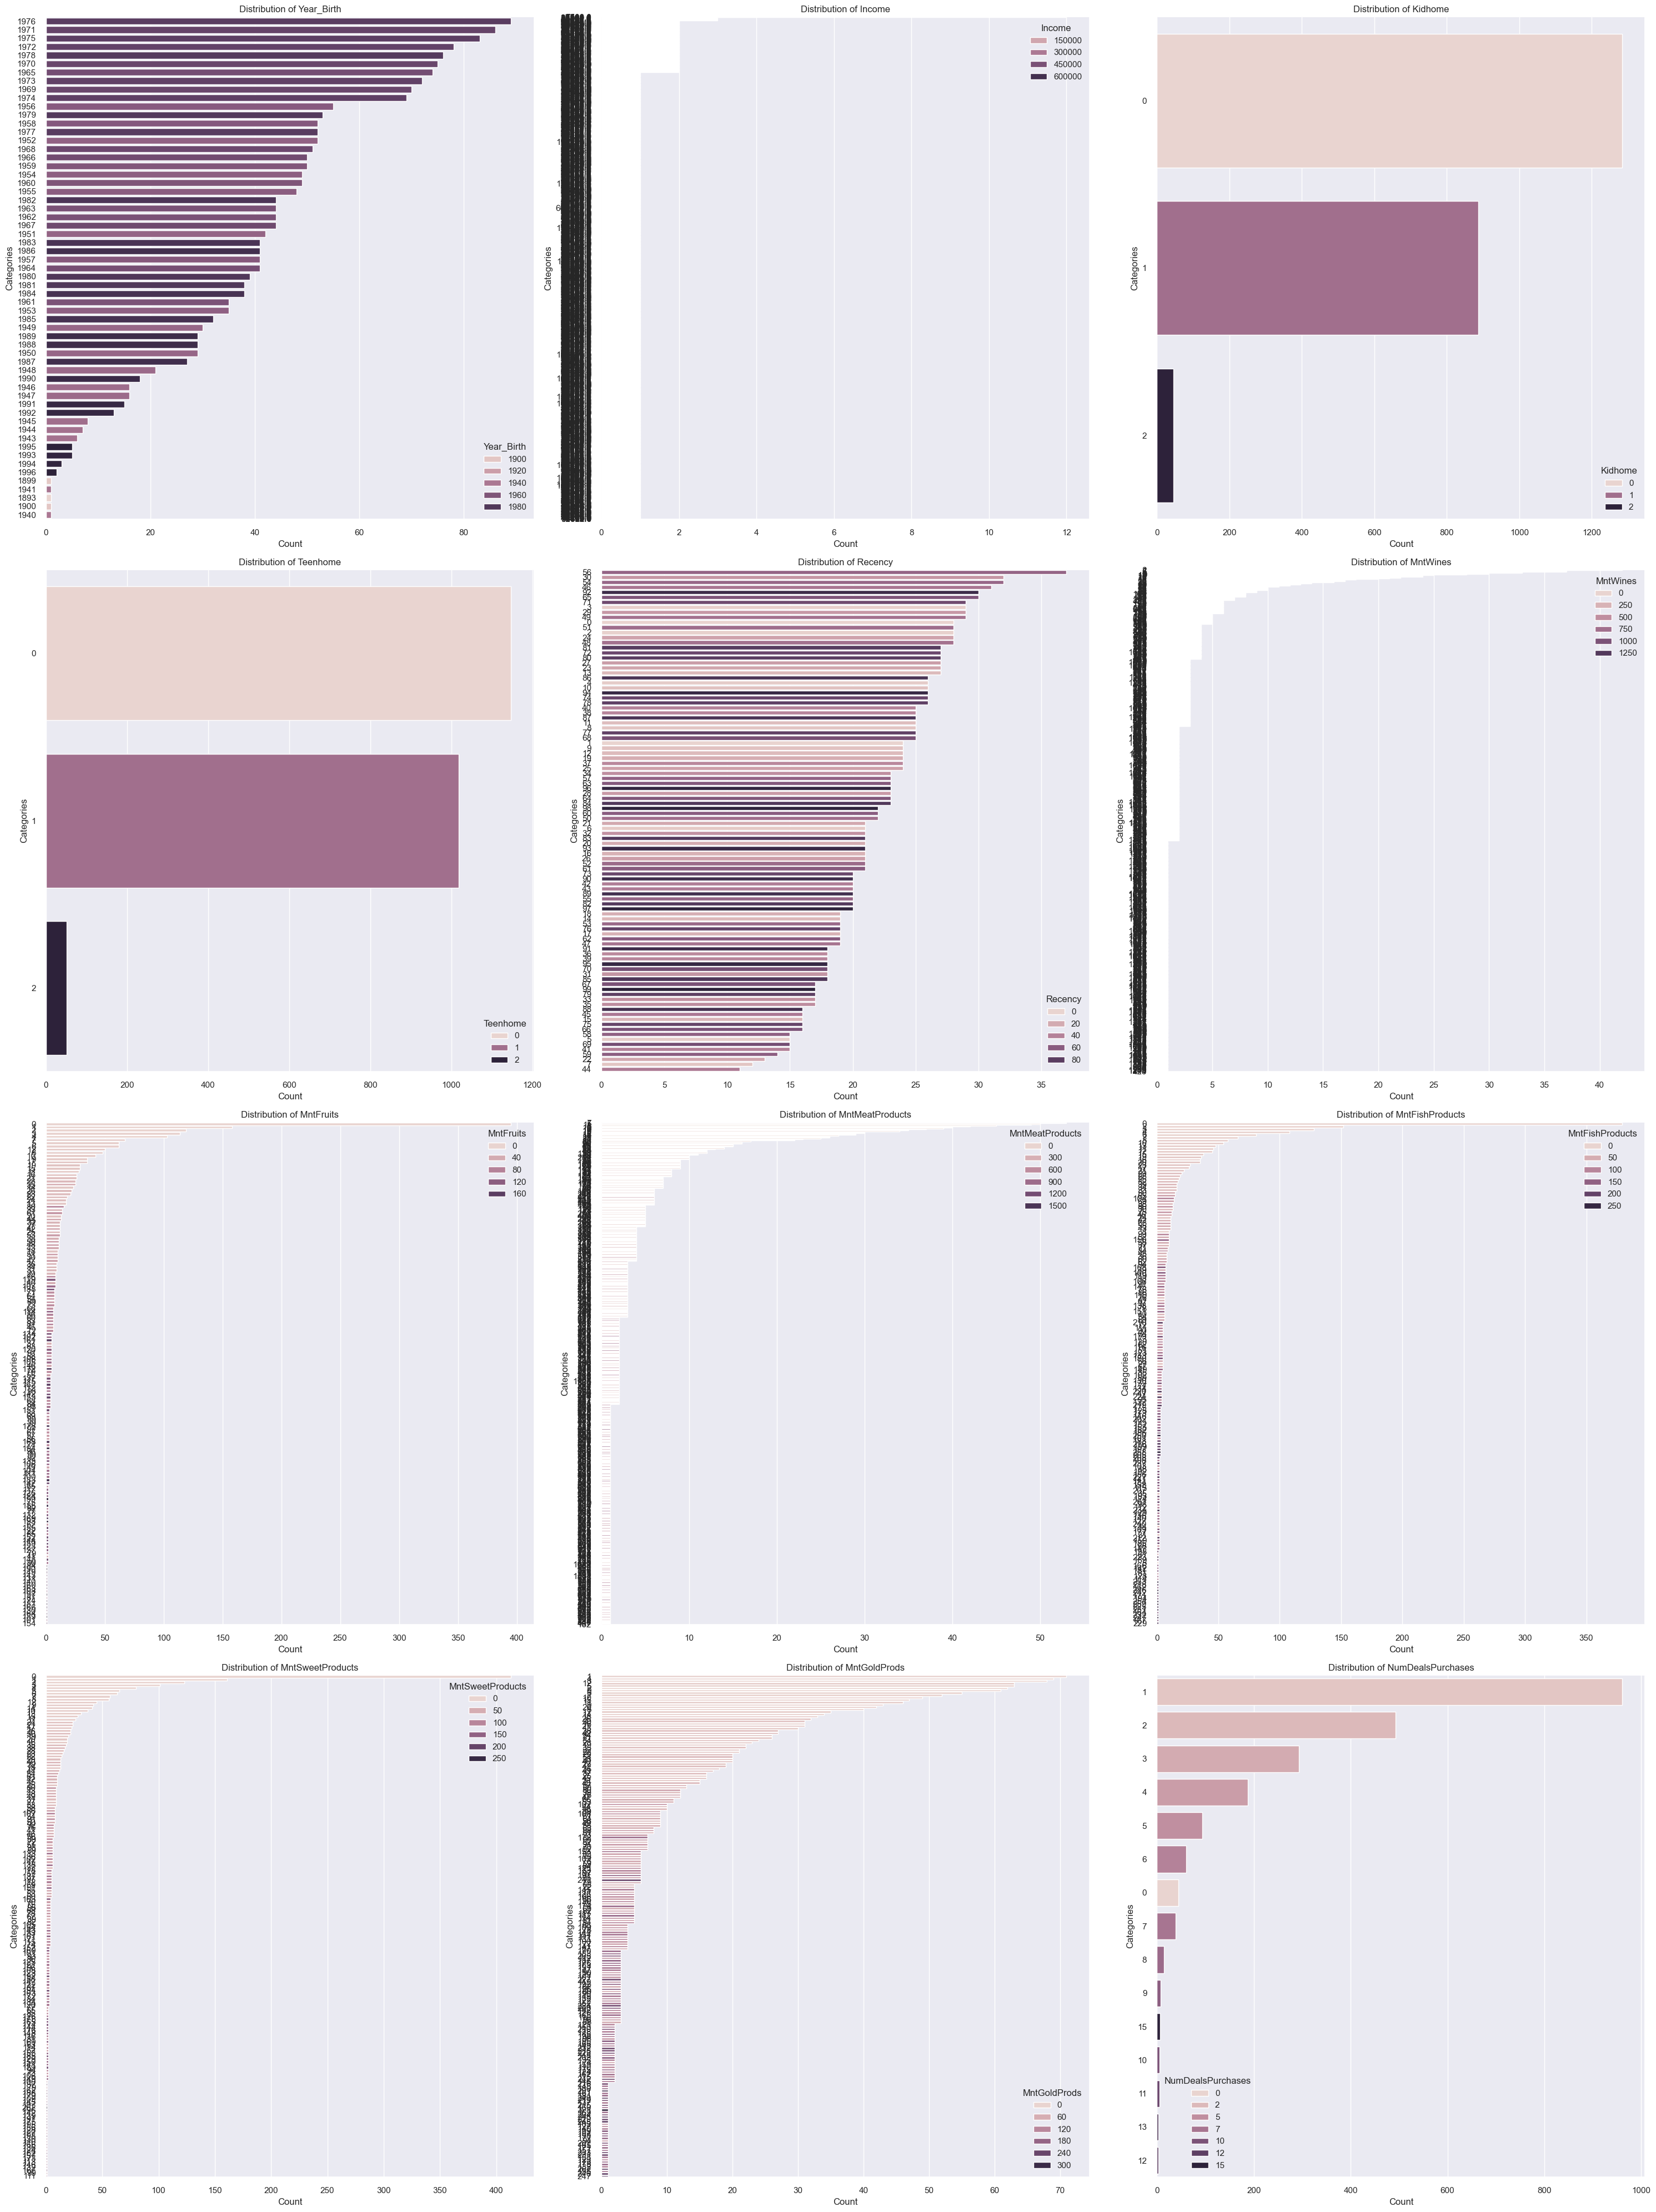

In [64]:
numcerial_Fit =  numcerial_Fit = df.describe().columns
fig, axes = plt.subplots(4, 3, figsize=(30, 40))  # Ukuran lebih besar
for i, j in zip(numcerial_Fit, axes.flatten()):
    ax = sns.countplot(data=df, y=i, ax=j, order=df[i].value_counts().index, hue= i)
    set_labels(x='Count', y='Categories', title=f'Distribution of {i}', axis=ax)  # Menggunakan fungsi set_labels

plt.tight_layout()
plt.show()


- Year_Birth: Sebagian besar pelanggan lahir antara tahun 1950 dan 1980, dengan jumlah signifikan lahir di awal tahun 1970-an.
- Income: Data menunjukkan distribusi yang miring dengan jumlah signifikan pelanggan berpenghasilan 150.000.
- Kidhome: Mayoritas pelanggan memiliki setidaknya satu anak di rumah (1), diikuti oleh pelanggan tanpa anak (0) dan sejumlah kecil pelanggan dengan dua anak (2).
- Teenhome: Mayoritas pelanggan memiliki setidaknya satu remaja di rumah (1), diikuti oleh pelanggan tanpa remaja (0) dan sejumlah kecil pelanggan dengan dua remaja (2).
- Recency: Distribusinya tampak seragam, dengan sebagian besar pelanggan aktif dalam 40 hari terakhir.
- MntWines: Terdapat distribusi yang sangat luas, menunjukkan bahwa sebagian besar pelanggan membeli sangat sedikit wine (0 hingga 250 unit). Sejumlah kecil pelanggan membeli wine dalam jumlah yang signifikan (lebih dari 1000 unit).
- MntFruits: Mayoritas pelanggan membeli sangat sedikit buah (0 hingga 40 unit). Sejumlah signifikan pelanggan membeli buah dalam jumlah besar (lebih dari 120 unit).
- MntMeatProducts: Mayoritas pelanggan membeli sangat sedikit produk daging (0 hingga 300 unit). Sejumlah signifikan pelanggan membeli produk daging dalam jumlah besar (lebih dari 900 unit).
- MntFishProducts: Mayoritas pelanggan membeli sangat sedikit produk ikan (0 hingga 50 unit). Sejumlah kecil pelanggan membeli produk ikan dalam jumlah signifikan (lebih dari 100 unit).
- MntSweetProducts: Mayoritas pelanggan membeli sangat sedikit produk manis (0 hingga 50 unit). Sejumlah kecil pelanggan membeli produk manis dalam jumlah signifikan (lebih dari 100 unit).
- MntGoldProds: Mayoritas pelanggan membeli sangat sedikit produk emas (0 hingga 60 unit). Sejumlah kecil pelanggan membeli produk emas dalam jumlah signifikan (lebih dari 180 unit).
- NumDealsPurchases: Mayoritas pelanggan memiliki sangat sedikit pembelian dengan penawaran khusus (0 hingga 5 unit). Sejumlah kecil pelanggan memiliki lebih dari 10 pembelian dengan penawaran khusus.

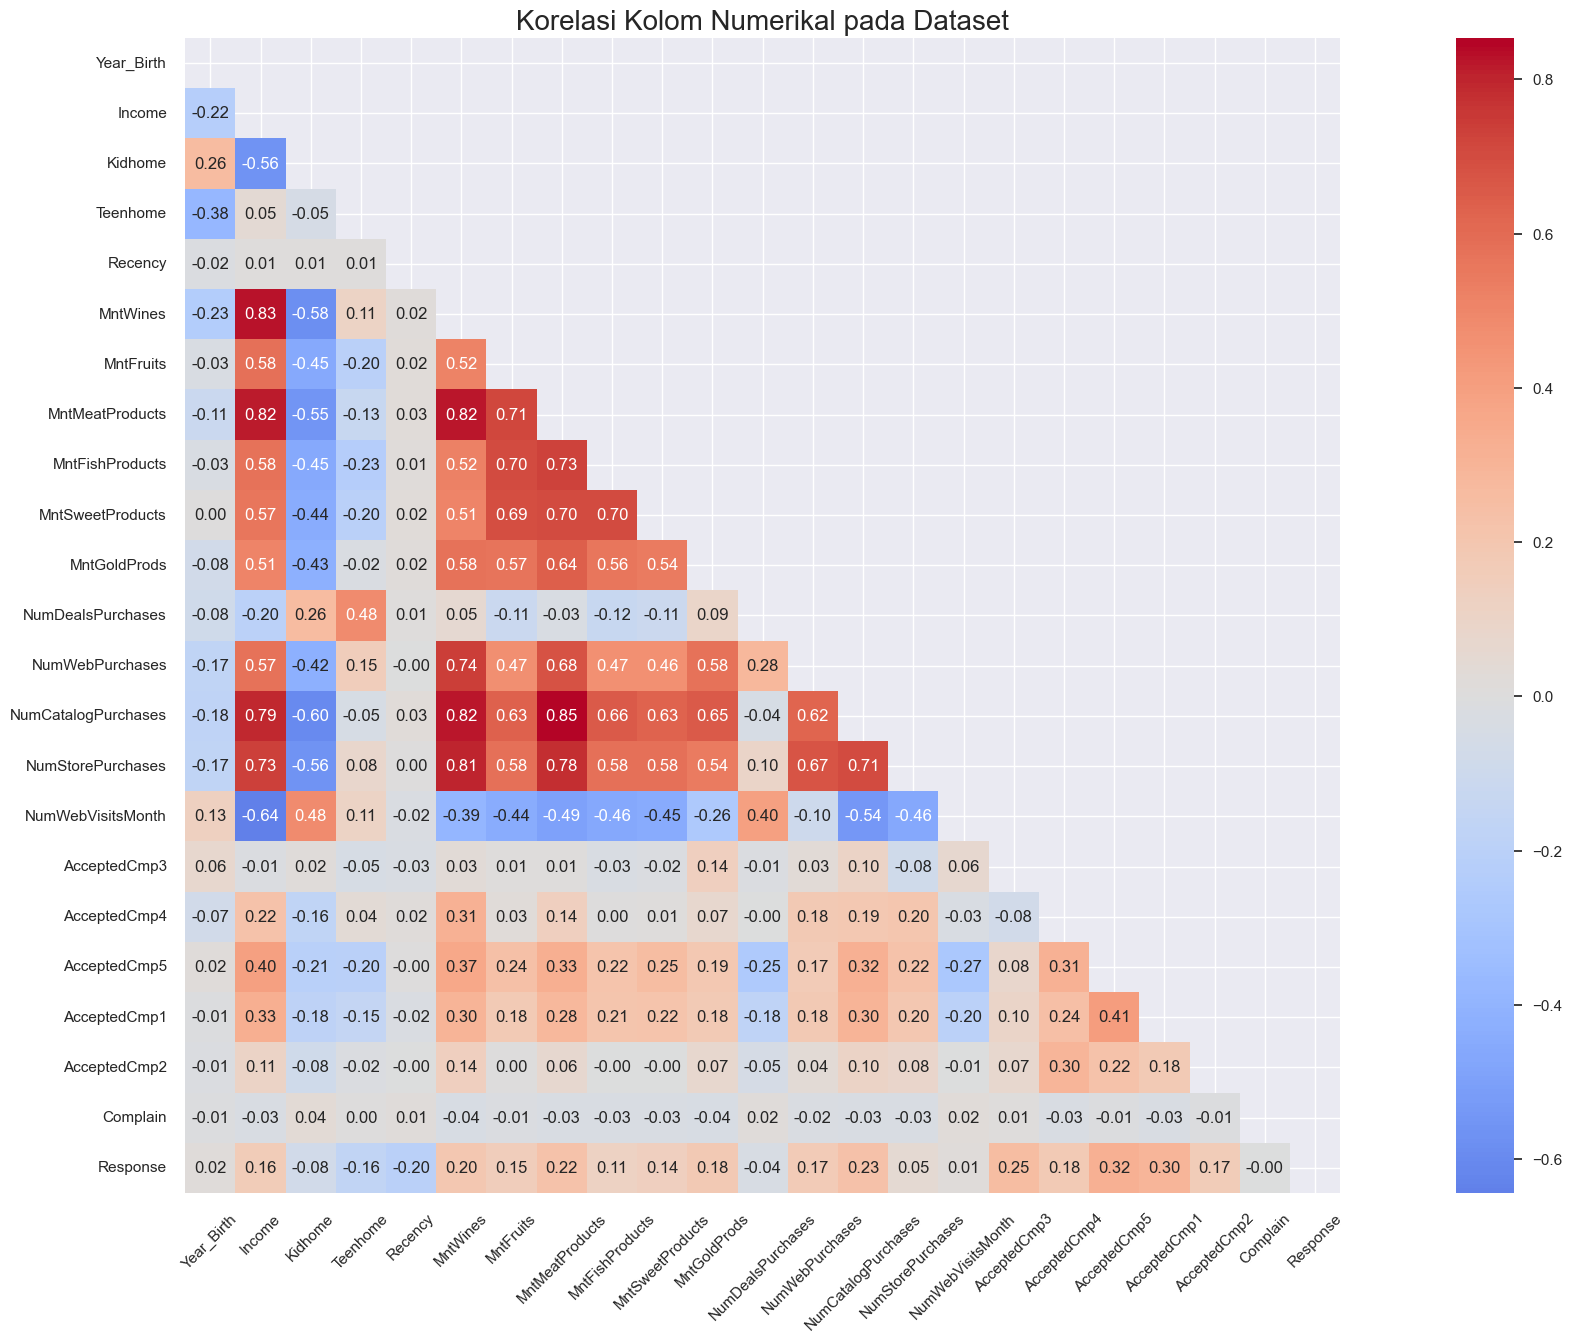

In [65]:
corr = df.corr

plt.figure(figsize=(30,15))

matrix = np.triu(df[numcerial_Fit].corr(method='spearman'))

sns.heatmap(data=df[numcerial_Fit].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Korelasi Kolom Numerikal pada Dataset',size=20)

plt.xticks(rotation=45)  
plt.yticks(rotation=0)

plt.show()

#### Insight Korelasi Antar Variabel
Analisis korelasi menunjukkan beberapa hubungan menarik antar variabel numerik dalam dataset:

Hubungan Positif yang Kuat:

`MntWines` berkorelasi positif kuat dengan `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases`.  Pelanggan yang membeli banyak wine  cenderung  membeli lebih banyak produk lain, baik makanan (daging, ikan, makanan penutup) maupun non-makanan (emas), dan  melakukan pembelian melalui berbagai saluran (online, katalog, dan toko fisik).  Ini  mengindikasikan  adanya  kecenderungan  one-stop shopping  pada  pelanggan  yang  membeli  wine.

Hubungan Negatif yang Kuat:

`MntWines` berkorelasi negatif kuat dengan `Kidhome` dan `Teenhome`, menunjukkan bahwa pelanggan yang membeli banyak wine cenderung tidak memiliki anak kecil atau remaja di rumah. Hal ini mungkin disebabkan oleh perbedaan prioritas belanja antara keluarga dengan anak dan tanpa anak.
`NumStorePurchases` berkorelasi negatif kuat dengan `NumWebVisitsMonth`. Pelanggan yang sering membeli di toko cenderung jarang mengunjungi situs web. Ini mungkin menunjukkan preferensi belanja offline pada kelompok pelanggan ini.
Hubungan yang Lemah:

Sebagian  besar  pasangan  variabel  lainnya  menunjukkan  korelasi  yang  lemah,  mengindikasikan  tidak  adanya  hubungan  yang  signifikan  di  antara  mereka.


### Kesimpulan Awal

Data konsumen yang dianalisis menunjukkan bahwa mayoritas konsumen adalah pasangan yang sudah menikah dengan tingkat pendidikan Graduation,  lahir antara tahun 1950 dan 1980, dan tidak memiliki anak kecil.  Produk wine  merupakan produk terlaris, sedangkan  fruit  kurang diminati.  Konsumen cenderung membeli  wine  bersamaan dengan produk lain, dan lebih memilih berbelanja di toko fisik.  Terdapat  indikasi  perlu  peningkatan  pada  strategi  CRM  dan  penanganan  data.  Analisis  lebih  lanjut,  seperti  segmentasi  pelanggan  dan  pemodelan  prediksi,  diperlukan  untuk  mengoptimalkan  strategi  bisnis  dan  meningkatkan  penjualan.

Pola  korelasi  antar  variabel  ini  memberikan  informasi  berharga  tentang  perilaku  pembelian  konsumen.  Informasi  ini  dapat  dimanfaatkan  untuk  berbagai  keperluan,  di  antaranya:

Segmentasi pelanggan: Mengidentifikasi kelompok pelanggan dengan pola pembelian yang serupa.
Rekomendasi produk: Memberikan rekomendasi produk yang relevan berdasarkan riwayat pembelian pelanggan.
Strategi pemasaran: Mengembangkan strategi pemasaran yang lebih tepat sasaran untuk meningkatkan penjualan.

Saran Strategi bisnis :<br>
Optimalkan strategi CRM untuk meningkatkan retensi pelanggan dan mendorong pembelian berulang.
Rancang program pemasaran yang lebih personal dan tepat sasaran. Berdasarkan segmentasi pelanggan. 
Tingkatkan promosi dan penawaran menarik untuk produk MntFruits, mengingat rentang usia yang cukup luas promosi berbasis kesehatan dengan konsumsi buah dapat di coba untuk menambah sales pada mntFruits
Pertimbangkan strategi omnichannel yang mengintegrasikan pengalaman belanja online dan offline.
Menambahkan layanan pesan antar melalui website jika memungkinkan untuk mendorong transaksi online

<h3> Data Transformation </h3>

In [66]:
df.head(1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1


In [67]:
#Mengonversi kolom Dt_Customer menjadi tipe datetime dengan format yang sesuai
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Mengambil tahun sebagai integer
df['Dt_Customer'] = df['Dt_Customer'].dt.year


In [68]:
df['Age'] = df['Dt_Customer']-df['Year_Birth']

In [69]:

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghitung statistik deskriptif
stats = numeric_df.describe()
print(stats)



        Year_Birth         Income      Kidhome     Teenhome  Dt_Customer  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415  2013.028430   
std      11.985554   25173.076661     0.536896     0.544181     0.685618   
min    1893.000000    1730.000000     0.000000     0.000000  2012.000000   
25%    1959.000000   35303.000000     0.000000     0.000000  2013.000000   
50%    1970.000000   51381.500000     0.000000     0.000000  2013.000000   
75%    1977.000000   68522.000000     1.000000     1.000000  2013.000000   
max    1996.000000  666666.000000     2.000000     2.000000  2014.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.

In [70]:
# Menghitung IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


In [71]:
# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(Year_Birth              1932.000
 Income                -14525.500
 Kidhome                   -1.500
 Teenhome                  -1.500
 Dt_Customer             2013.000
 Recency                  -51.000
 MntWines                -697.500
 MntFruits                -44.500
 MntMeatProducts         -308.375
 MntFishProducts          -67.500
 MntSweetProducts         -47.000
 MntGoldProds             -61.500
 NumDealsPurchases         -2.000
 NumWebPurchases           -4.000
 NumCatalogPurchases       -6.000
 NumStorePurchases         -4.500
 NumWebVisitsMonth         -3.000
 AcceptedCmp3               0.000
 AcceptedCmp4               0.000
 AcceptedCmp5               0.000
 AcceptedCmp1               0.000
 AcceptedCmp2               0.000
 Complain                   0.000
 Response                   0.000
 Age                        9.000
 dtype: float64,
 Year_Birth               2004.000
 Income                 118350.500
 Kidhome                     2.500
 Teenhome                   

In [72]:
# Menemukan outlier
outliers = numeric_df[(numeric_df < lower_bound) | (numeric_df > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
      Year_Birth  Income  Kidhome  Teenhome  Dt_Customer  Recency  MntWines  \
0            NaN     NaN      NaN       NaN       2012.0      NaN       NaN   
1            NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
2            NaN     NaN      NaN       NaN          NaN      NaN       NaN   
3            NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
4            NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
...          ...     ...      ...       ...          ...      ...       ...   
2235         NaN     NaN      NaN       NaN          NaN      NaN       NaN   
2236         NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
2237         NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
2238         NaN     NaN      NaN       NaN       2014.0      NaN       NaN   
2239         NaN     NaN      NaN       NaN       2012.0      NaN       NaN   

      MntFruits  MntMeatProducts  MntFish

In [73]:
cleaned_df = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

<h3> Uji Kembali </h3>

<Figure size 2000x1500 with 0 Axes>

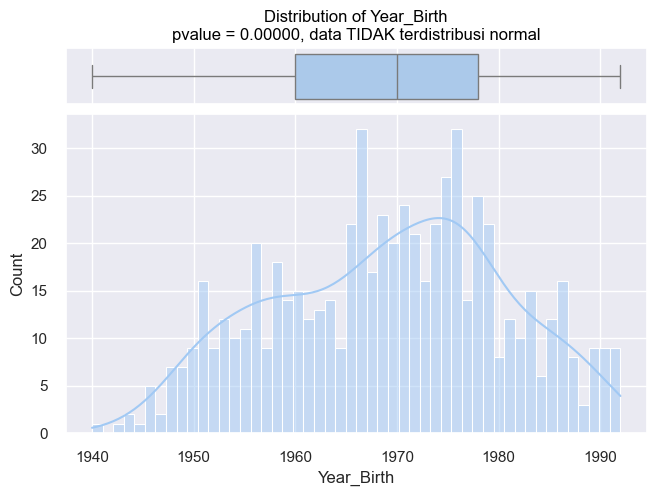

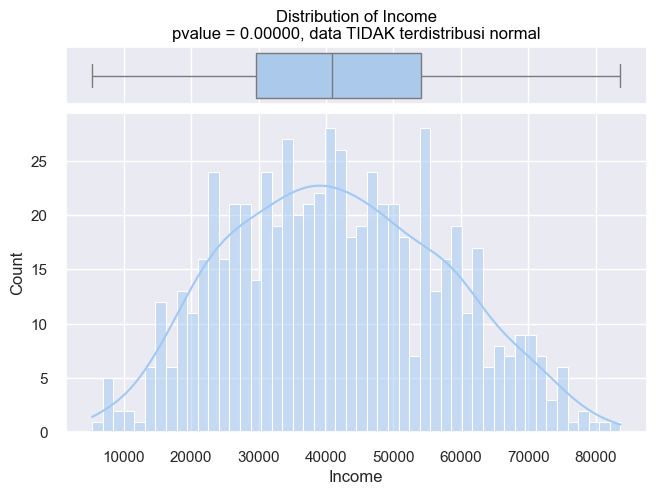

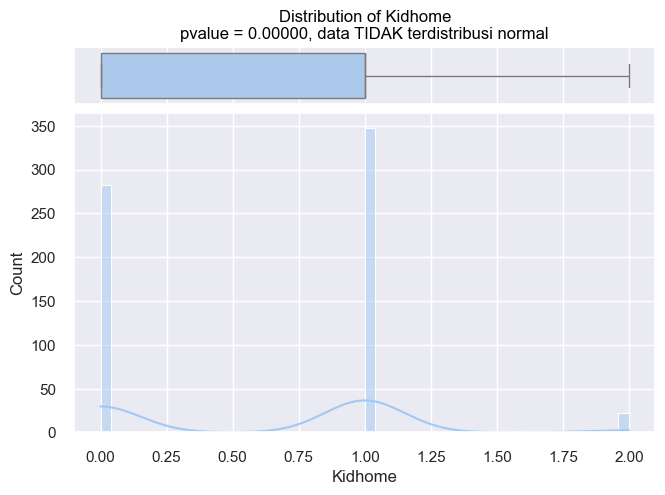

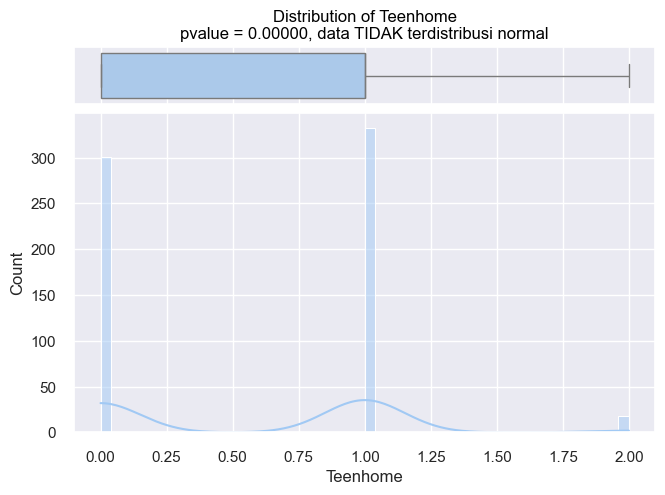

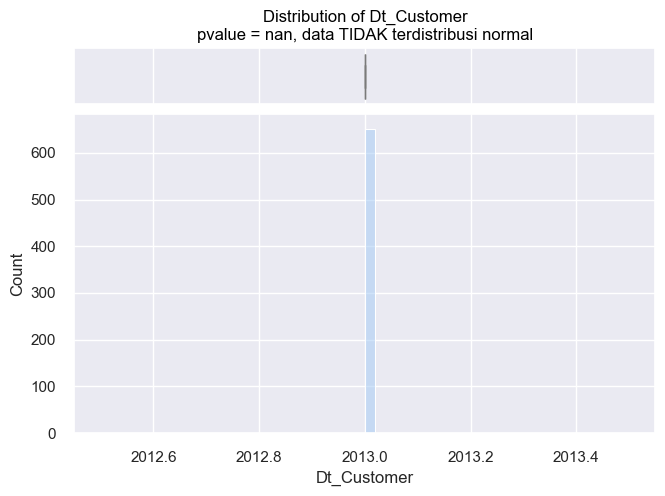

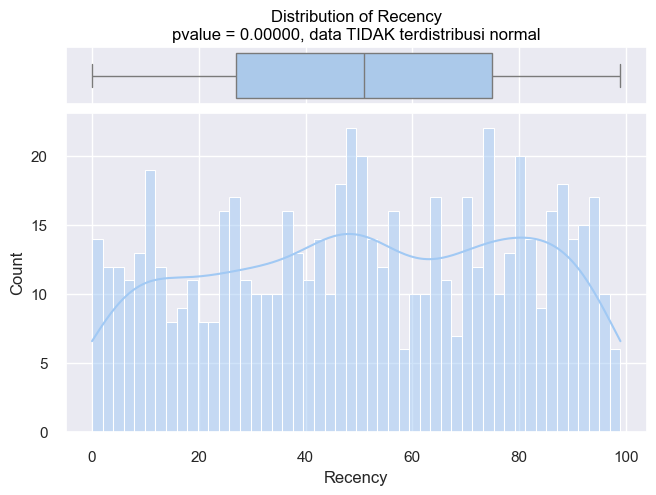

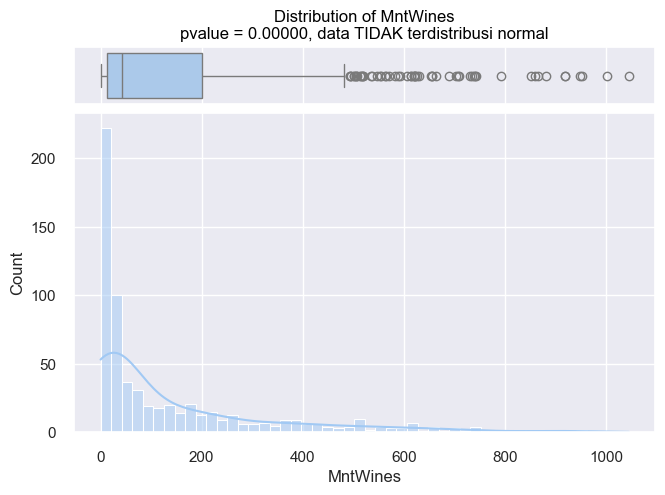

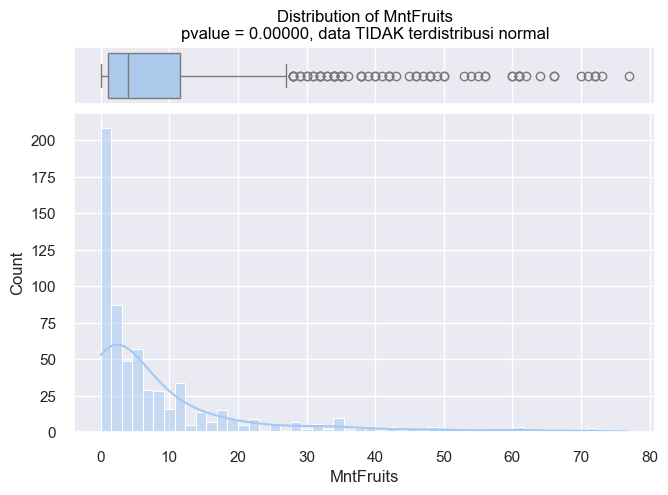

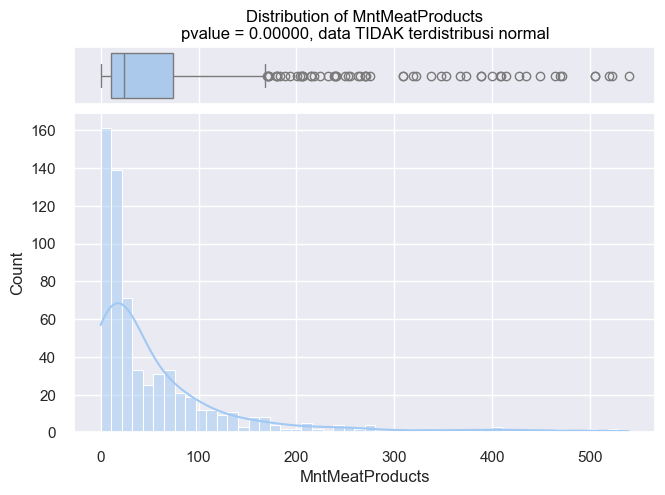

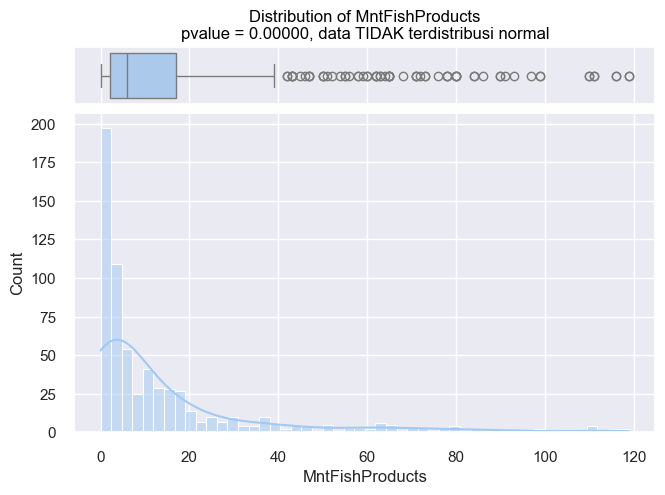

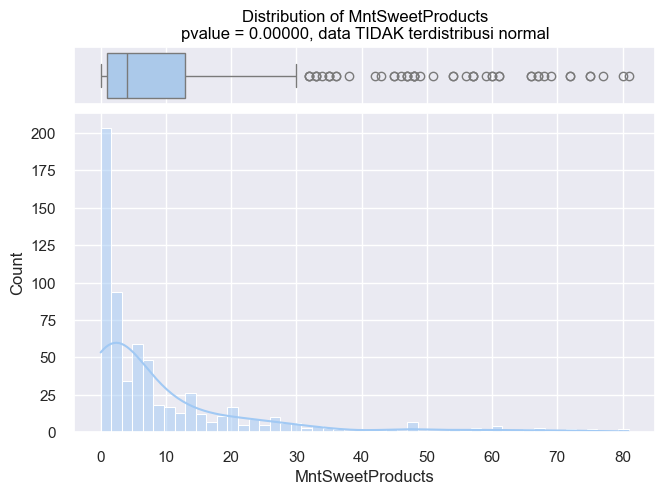

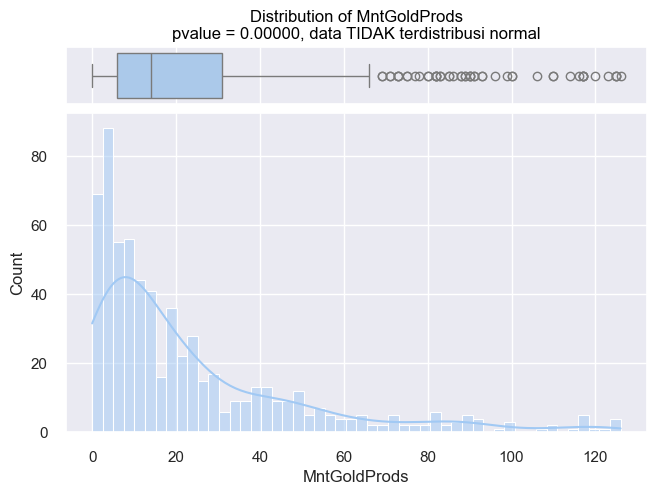

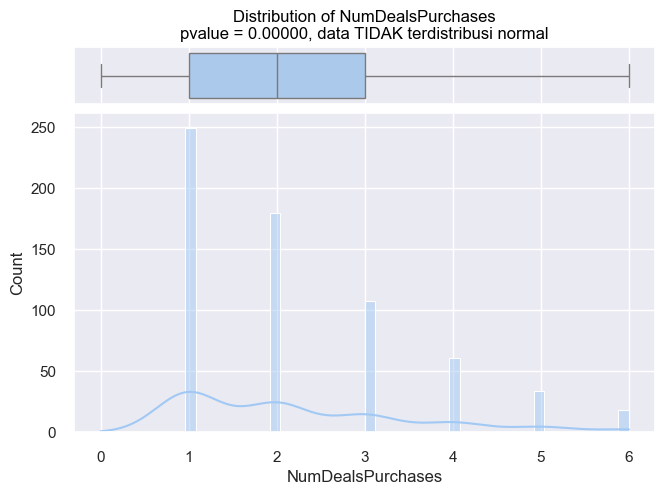

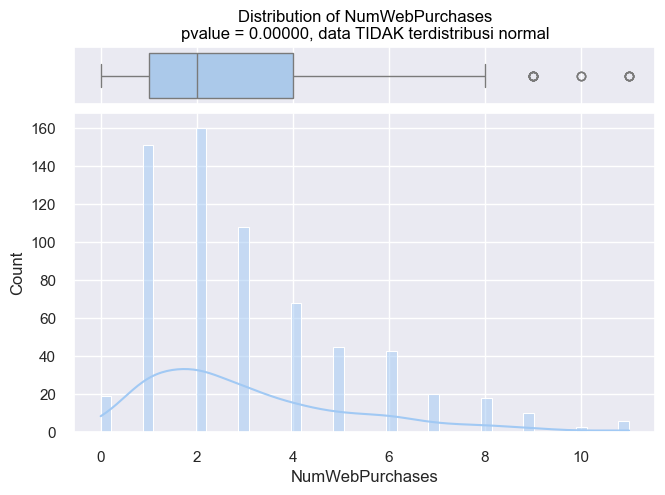

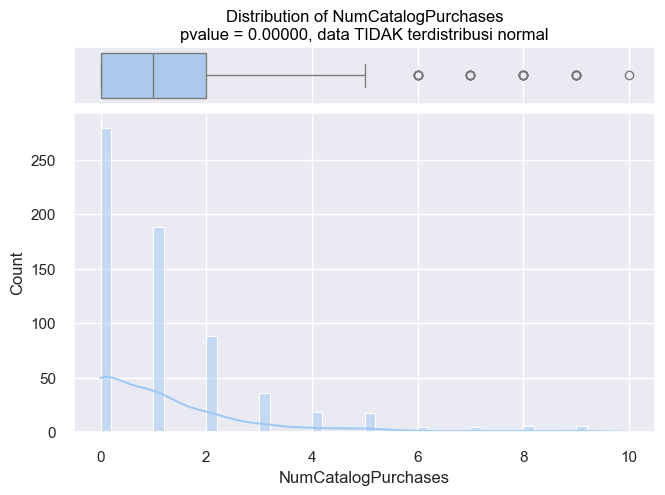

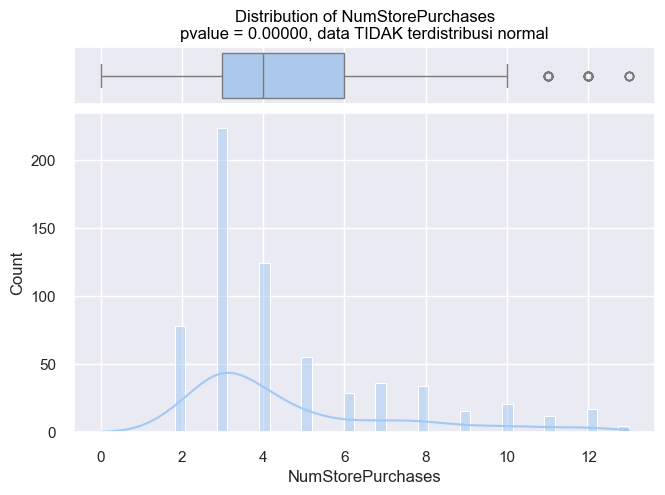

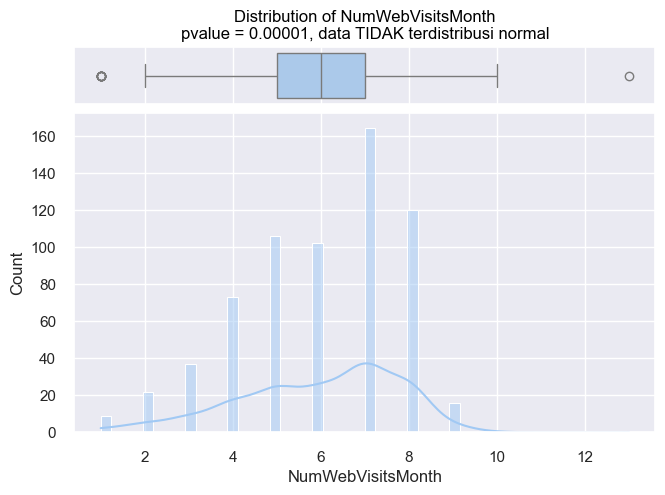

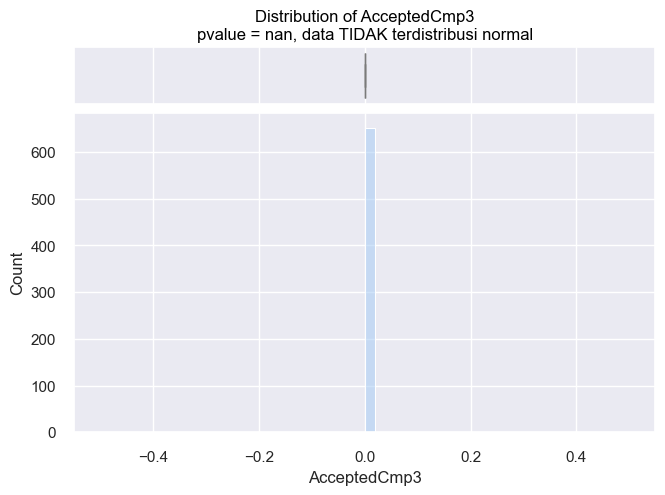

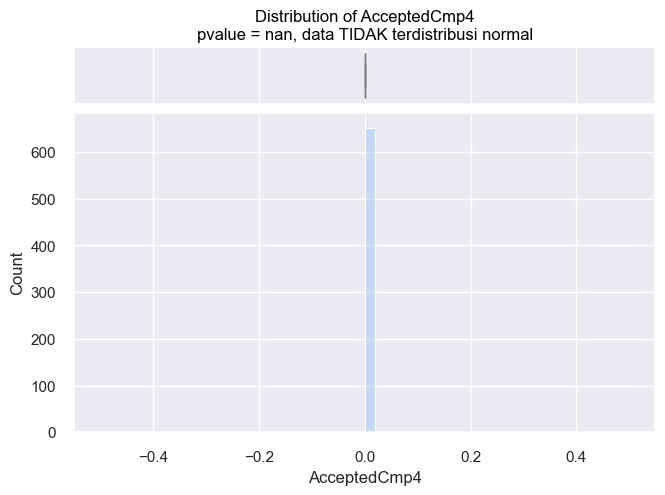

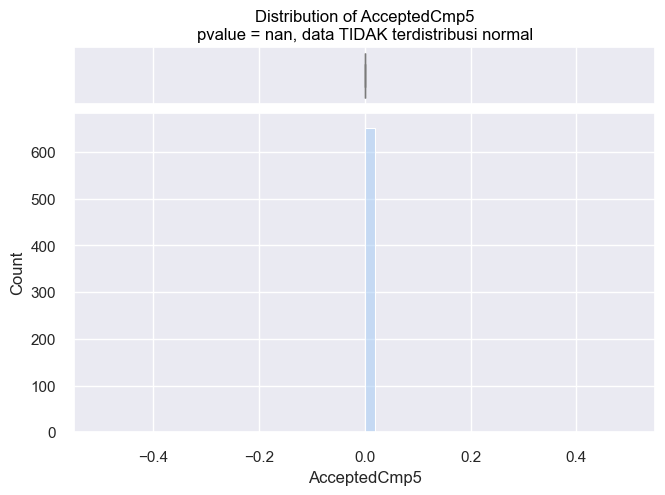

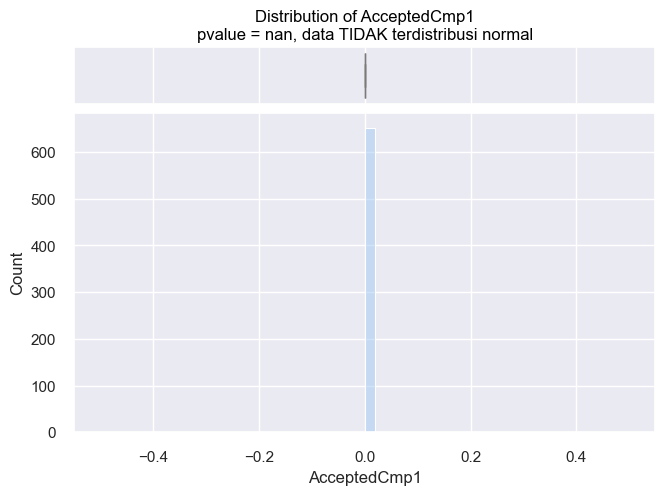

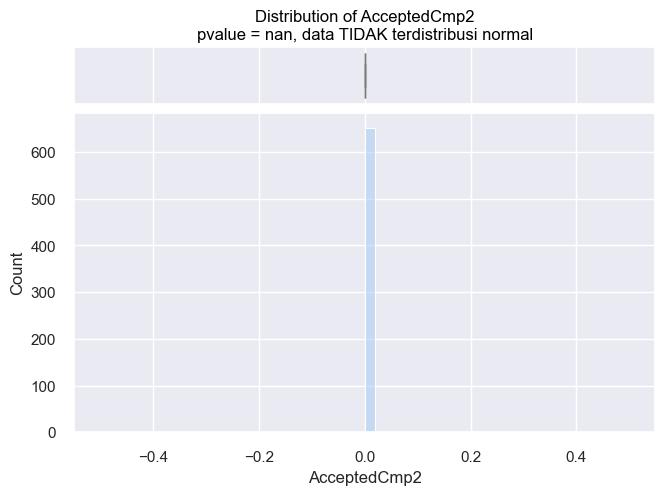

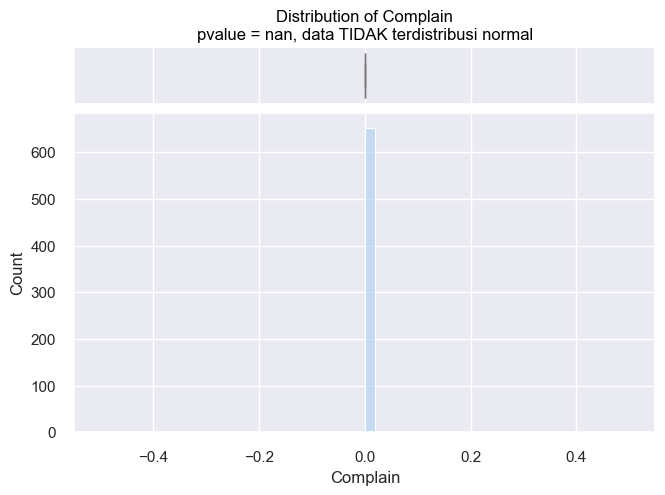

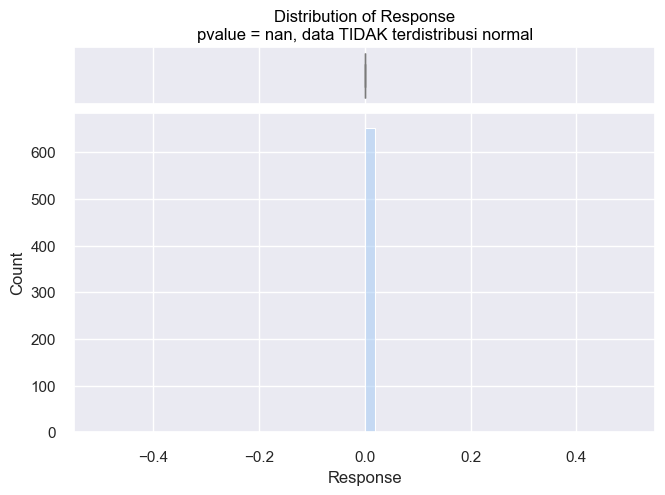

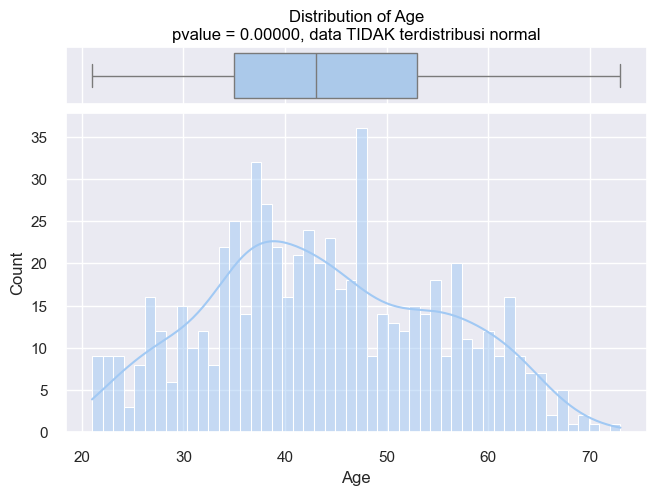

In [74]:
plt.figure(figsize=(20, 15))
for col in cleaned_df.columns:
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                  "hspace": 0.05})

    # Uji normalitas
    stat, pvalue = normaltest(cleaned_df[col].dropna())

    if pvalue > 0.05:
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else:
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {col}\n{distribusi}", color="black")
    sns.boxplot(x=cleaned_df[col], ax=ax1)
    ax1.set(xlabel="")

    sns.histplot(data=cleaned_df[col], ax=ax2, stat="count", kde=True, bins=50)

    plt.show()

In [75]:
numeric_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1957,58138.0,0,0,2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55
1,1954,46344.0,1,1,2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,1965,71613.0,0,0,2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48
3,1984,26646.0,1,0,2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,1981,58293.0,1,0,2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33


In [76]:
for col in numeric_df.columns:
    numeric_df[col] = np.sqrt(numeric_df[col])

In [77]:
from scipy.stats import normaltest

for col in numeric_df.columns:
    stat, pvalue = normaltest(numeric_df[col].dropna())
    if pvalue > 0.05:
        print(f'{col}: pvalue = {pvalue:.5f}, data terdistribusi normal')
    else:
        print(f'{col}: pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal')

Year_Birth: pvalue = 0.00000, data TIDAK terdistribusi normal
Income: pvalue = 0.00000, data TIDAK terdistribusi normal
Kidhome: pvalue = 0.00000, data TIDAK terdistribusi normal
Teenhome: pvalue = 0.00000, data TIDAK terdistribusi normal
Dt_Customer: pvalue = 0.00000, data TIDAK terdistribusi normal
Recency: pvalue = 0.00000, data TIDAK terdistribusi normal
MntWines: pvalue = 0.00000, data TIDAK terdistribusi normal
MntFruits: pvalue = 0.00000, data TIDAK terdistribusi normal
MntMeatProducts: pvalue = 0.00000, data TIDAK terdistribusi normal
MntFishProducts: pvalue = 0.00000, data TIDAK terdistribusi normal
MntSweetProducts: pvalue = 0.00000, data TIDAK terdistribusi normal
MntGoldProds: pvalue = 0.00000, data TIDAK terdistribusi normal
NumDealsPurchases: pvalue = 0.00000, data TIDAK terdistribusi normal
NumWebPurchases: pvalue = 0.25049, data terdistribusi normal
NumCatalogPurchases: pvalue = 0.00000, data TIDAK terdistribusi normal
NumStorePurchases: pvalue = 0.00000, data TIDAK ter

<h4>Transformasi Data tidak berhasil</h4>
maka pengujian ditetapkan dilakukan dengan uji statistik non parametrik

In [78]:
from scipy.stats import kruskal

#### Evaluasi NonParametrik Spearman
<div style="text-align: center;">
    <img src="../img/6output.png" alt="Spearman" />
</div>

In [79]:
df.head(1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55


In [80]:
#Uji statistik non parametrik II
#Uji hubungan Bundling Produk

# Melakukan uji Kruskal-Wallis
stat, pvalue = kruskal(df['MntWines'], df['MntMeatProducts'], df['MntFishProducts'])

# Menampilkan hasil
print(f'Statistik Uji: {stat}, p-value: {pvalue}')

# Menentukan signifikansi
alpha = 0.05
if pvalue < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak H0: Tidak ada perbedaan signifikan antara kelompok.")


Statistik Uji: 1431.7845290638993, p-value: 1.23577634152e-311
Tolak H0: Ada perbedaan signifikan antara kelompok.


In [81]:
#Uji Hubungan Bundling II
stat, pvalue = kruskal(df['NumWebPurchases'], df['NumCatalogPurchases'], df['NumStorePurchases'])

# Menampilkan hasil
print(f'Statistik Uji: {stat}, p-value: {pvalue}')

# Menentukan signifikansi
alpha = 0.05
if pvalue < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak H0: Tidak ada perbedaan signifikan antara kelompok.")


Statistik Uji: 1230.4568083818158, p-value: 6.452068205958333e-268
Tolak H0: Ada perbedaan signifikan antara kelompok.


## Kesimpulan Final 

Terdapat perbedaan signifikan dalam pengeluaran pelanggan untuk produk Wine, Meat Product, dan Fish Product.
Ini berarti strategi pemasaran dan penjualan perlu disesuaikan dengan preferensi setiap kelompok pelanggan, berdasarkan uji statistik spearman ada keterikatan positif antara produk wines dan meat, Namun uji kruskal menunjukkan perbedaan antara populasi yang berarti diantara 2 produck memiliki perbedaan jumlah.

-   Pada Fenomena lain pendapatan, keberadaan anak, dan tingkat pendidikan adalah faktor-faktor yang mempengaruhi pengeluaran pelanggan untuk produk-produk tersebut.

-   Ditemukan pola pelanggan dengan pendapatan tinggi dan berpendidikan tinggi cenderung lebih banyak mengeluarkan uang untuk Wine dan Meat Product. 

-   Pelanggan tanpa anak cenderung lebih banyak mengeluarkan uang untuk Wine dan Meat Product, ini berguna bagi team marketing untuk lebih fokus kepada konsumen dengan kelompok ini

-   Pelanggan dengan anak cenderung lebih banyak mengeluarkan uang untuk Fish Product.

-   Segmentasi pelanggan dapat dilakukan berdasarkan pendapatan, keberadaan anak, dan tingkat pendidikan.



Strategi pemasaran:
-   Penawaran khusus untuk produk Wine dan Meat Product kepada pelanggan dengan pendapatan tinggi dan berpendidikan tinggi.
-   Tawarkan produk Fish Product dengan harga yang lebih terjangkau untuk menarik pelanggan dengan anak.

Bundling produk:

-   Pertimbangkan untuk membuat paket bundling Wine dan Meat Product.

-   Tawarkan bundling produk Fish Product dengan produk-produk yang relevan